## Importa√ß√µes

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
data = pd.read_csv('ObesityDataSet.csv')
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## Descrevendo o conjunto de dados

In [29]:
# 1
columns = data.columns
N = data.shape[0] # amostras
D = data.shape[1] - 1  # preditores
L = data['NObeyesdad'].nunique() # classes
class_distribution = data['NObeyesdad'].value_counts() # distribui√ß√£o das classes

In [10]:
print(f'N√∫mero de amostras (N): {N}')

N√∫mero de amostras (N): 2111


In [11]:
# preditores gr√°fico
print(f'N√∫mero de preditores (D): {D}')

N√∫mero de preditores (D): 16


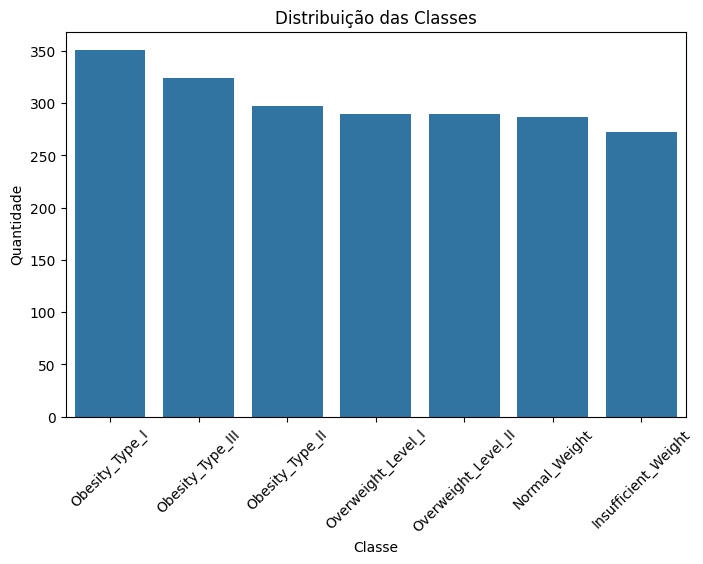

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='NObeyesdad', data=data, order=class_distribution.index)
plt.title('Distribui√ß√£o das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.savefig("distribuicao-classes.png", dpi=300)
plt.show()

# Dados Faltantes


In [12]:
# Verifica valores ausentes em cada coluna
missing_values = data.isnull().sum()

# Mostra apenas colunas que possuem valores faltantes
missing_values = missing_values[missing_values > 0]

print(" Valores faltantes por vari√°vel:")
print(missing_values)

 Valores faltantes por vari√°vel:
Series([], dtype: int64)


# An√°lise Monovariada

In [12]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

print("Vari√°veis num√©ricas:")
print(numeric_cols)

Vari√°veis num√©ricas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


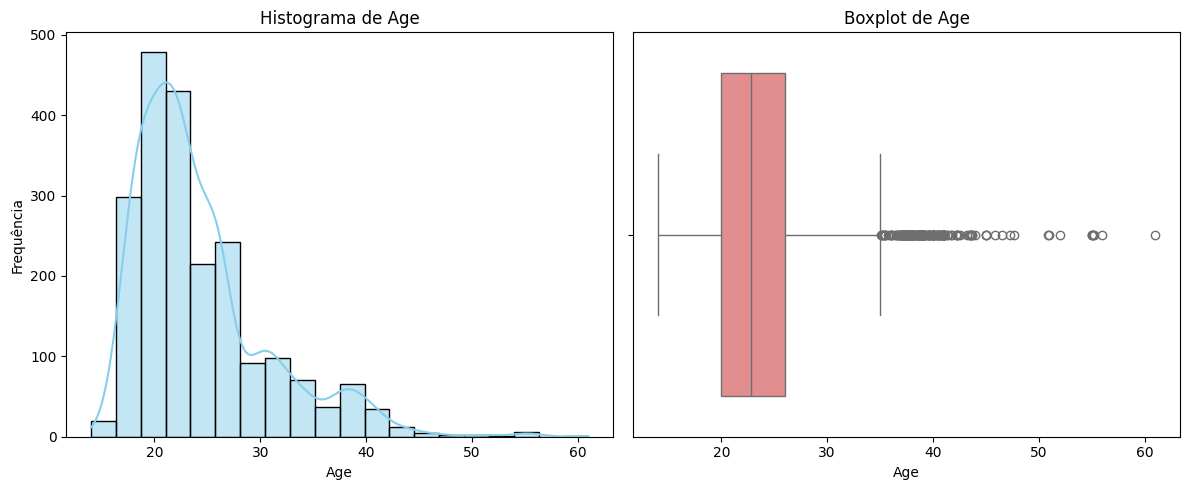

Age
  M√©dia (Œº): 24.31
  Desvio padr√£o (œÉ): 6.35
  Assimetria (Œ≥): 1.53
----------------------------------------


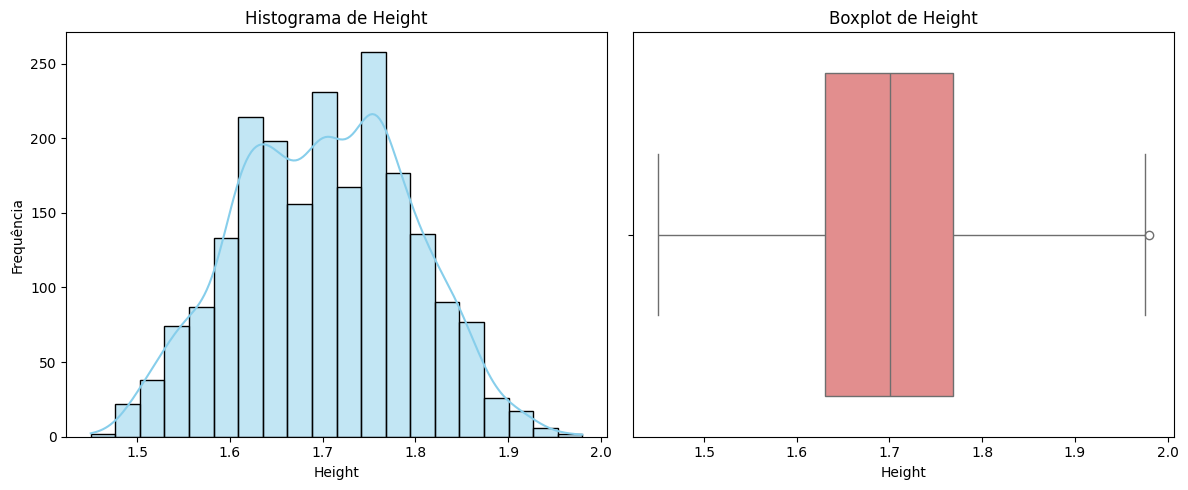

Height
  M√©dia (Œº): 1.70
  Desvio padr√£o (œÉ): 0.09
  Assimetria (Œ≥): -0.01
----------------------------------------


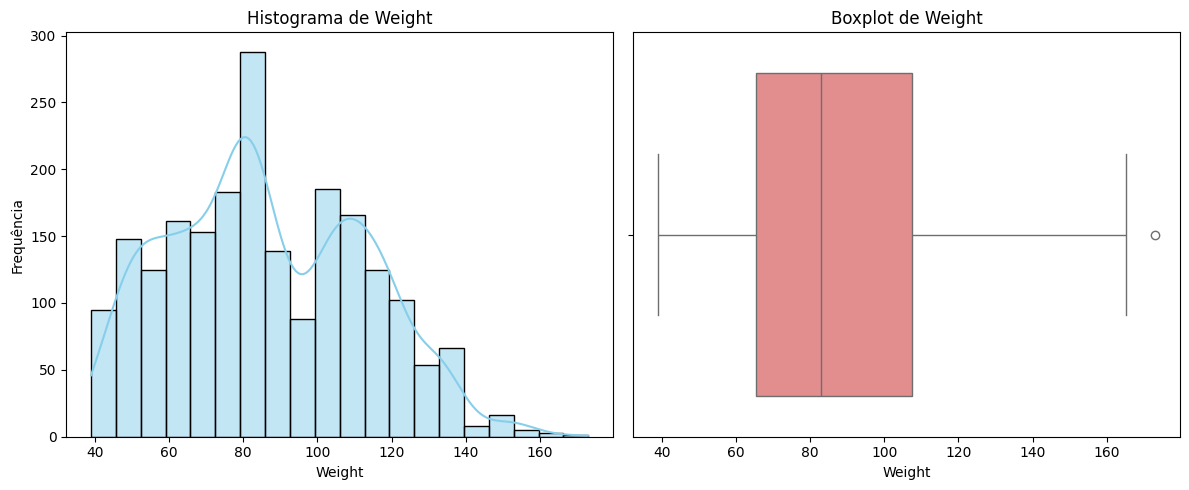

Weight
  M√©dia (Œº): 86.59
  Desvio padr√£o (œÉ): 26.19
  Assimetria (Œ≥): 0.26
----------------------------------------


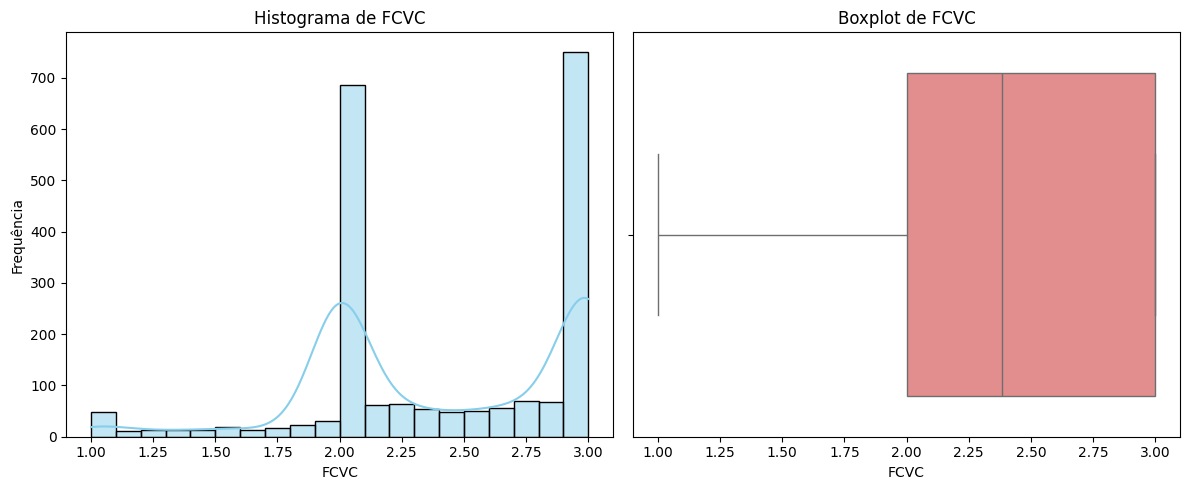

FCVC
  M√©dia (Œº): 2.42
  Desvio padr√£o (œÉ): 0.53
  Assimetria (Œ≥): -0.43
----------------------------------------


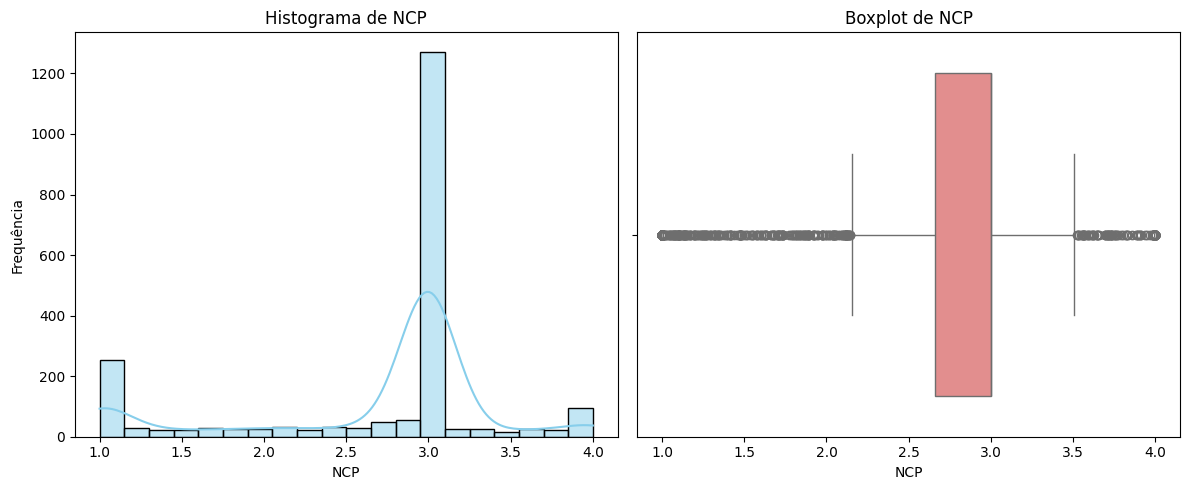

NCP
  M√©dia (Œº): 2.69
  Desvio padr√£o (œÉ): 0.78
  Assimetria (Œ≥): -1.11
----------------------------------------


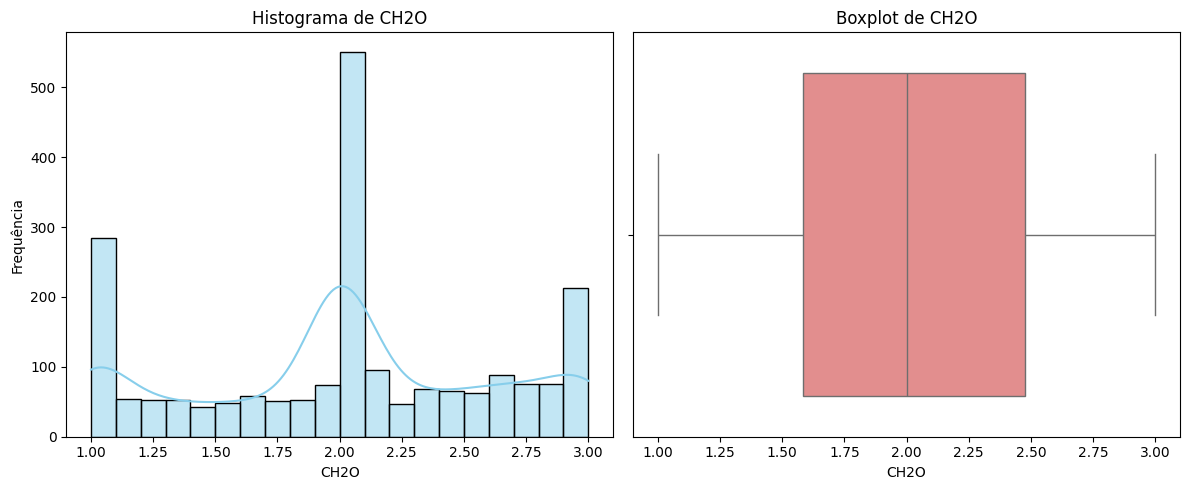

CH2O
  M√©dia (Œº): 2.01
  Desvio padr√£o (œÉ): 0.61
  Assimetria (Œ≥): -0.10
----------------------------------------


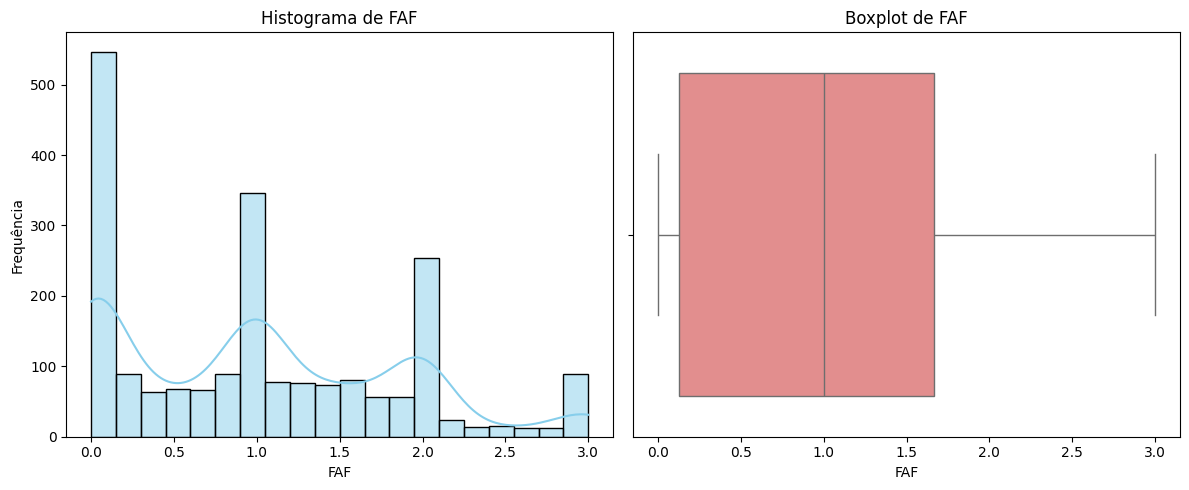

FAF
  M√©dia (Œº): 1.01
  Desvio padr√£o (œÉ): 0.85
  Assimetria (Œ≥): 0.50
----------------------------------------


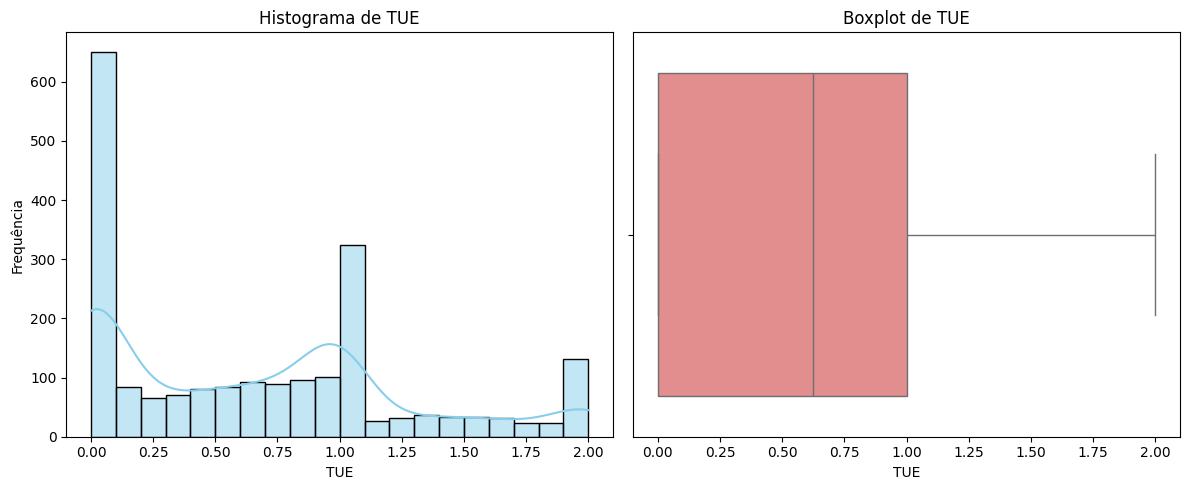

TUE
  M√©dia (Œº): 0.66
  Desvio padr√£o (œÉ): 0.61
  Assimetria (Œ≥): 0.62
----------------------------------------


In [13]:
# Criar a pasta de sa√≠da se n√£o existir
output_dir = "figures/monovariate_analysis"
os.makedirs(output_dir, exist_ok=True)

# Cria o conjunto de figuras para cada vari√°vel num√©rica
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Subplot 1: histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')

    # Subplot 2: boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()

    # salva cada figura na subpasta
    plt.savefig(f"{output_dir}/{col}_monovariate.png", dpi=300)

    plt.show()

    # C√°lculo das estat√≠sticas
    mean = data[col].mean()
    std = data[col].std()
    skewness = skew(data[col].dropna())

    print(f"{col}")
    print(f"  M√©dia (Œº): {mean:.2f}")
    print(f"  Desvio padr√£o (œÉ): {std:.2f}")
    print(f"  Assimetria (Œ≥): {skewness:.2f}")
    print("-"*40)


# An√°lise Monovariada Condicional





========================= AN√ÅLISE DA VARI√ÅVEL: AGE =========================

--- Analisando 'Age' para a Classe: Insufficient_Weight ---


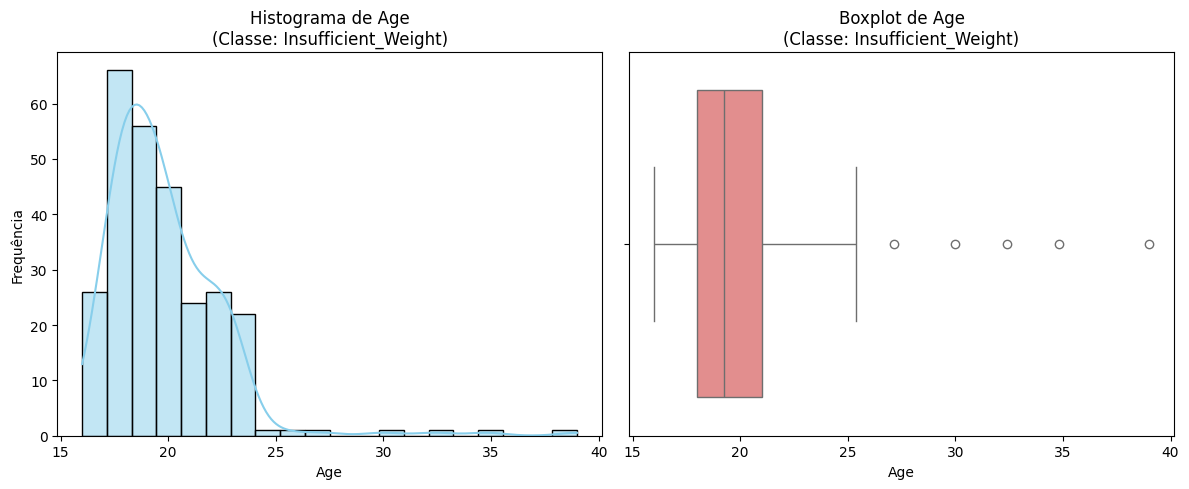

üìà Estat√≠sticas de 'Age' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 19.78
   Desvio padr√£o (œÉ): 2.67
   Assimetria (Œ≥): 2.76
--------------------------------------------------

--- Analisando 'Age' para a Classe: Normal_Weight ---


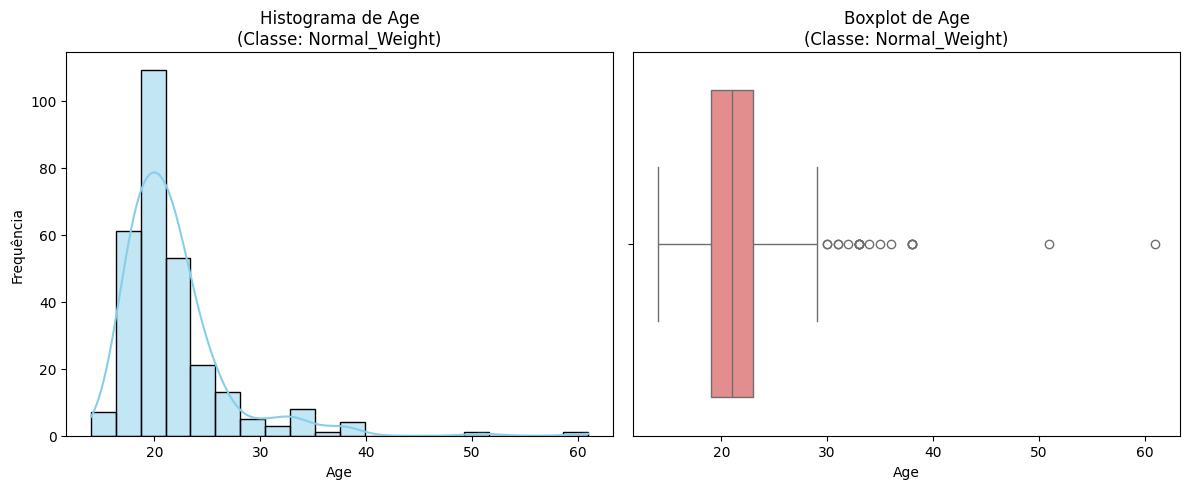

üìà Estat√≠sticas de 'Age' para a classe 'Normal_Weight':
   M√©dia (Œº): 21.74
   Desvio padr√£o (œÉ): 5.10
   Assimetria (Œ≥): 3.13
--------------------------------------------------

--- Analisando 'Age' para a Classe: Obesity_Type_I ---


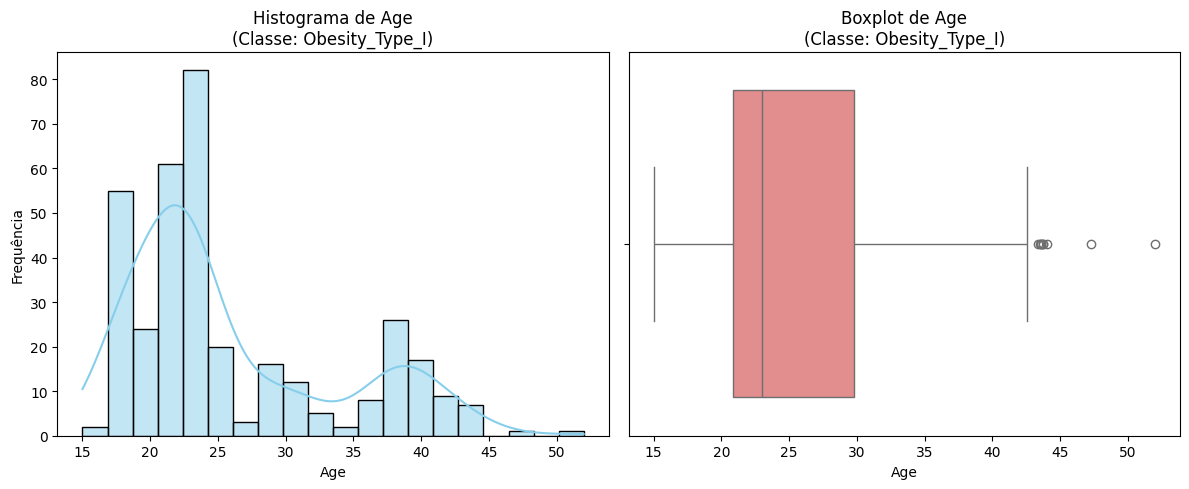

üìà Estat√≠sticas de 'Age' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 25.88
   Desvio padr√£o (œÉ): 7.76
   Assimetria (Œ≥): 1.02
--------------------------------------------------

--- Analisando 'Age' para a Classe: Obesity_Type_II ---


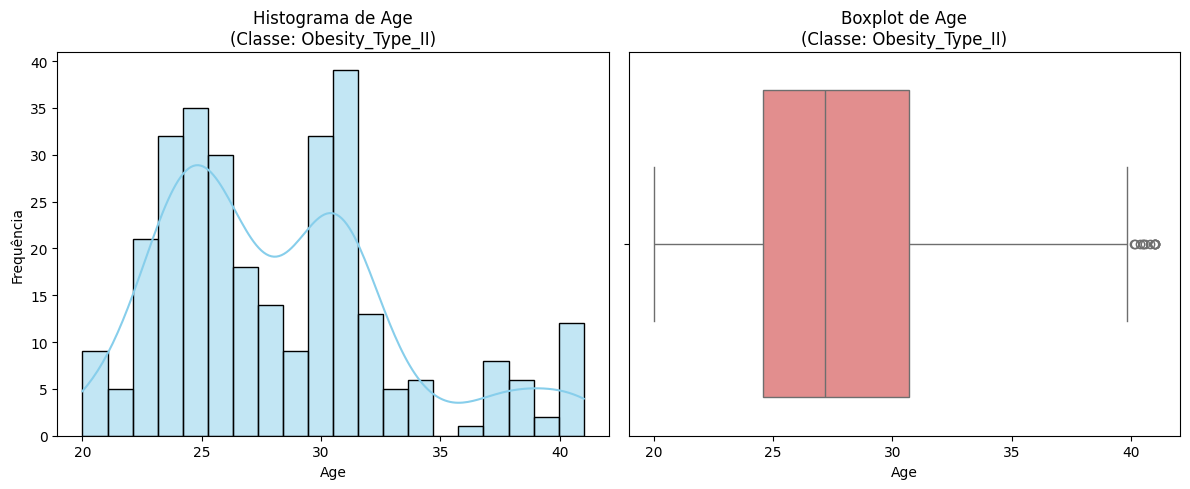

üìà Estat√≠sticas de 'Age' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 28.23
   Desvio padr√£o (œÉ): 4.87
   Assimetria (Œ≥): 0.82
--------------------------------------------------

--- Analisando 'Age' para a Classe: Obesity_Type_III ---


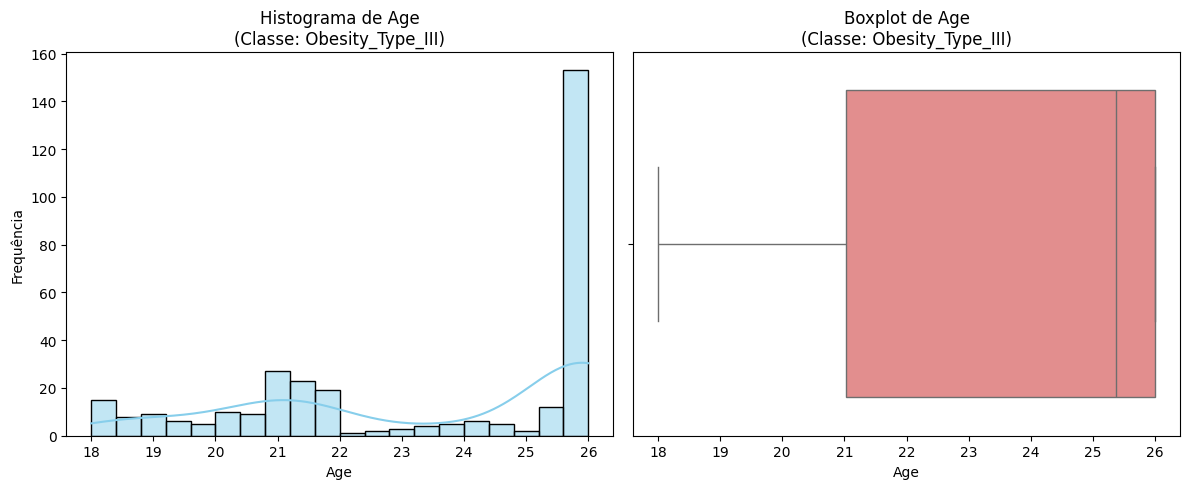

üìà Estat√≠sticas de 'Age' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 23.50
   Desvio padr√£o (œÉ): 2.76
   Assimetria (Œ≥): -0.52
--------------------------------------------------

--- Analisando 'Age' para a Classe: Overweight_Level_I ---


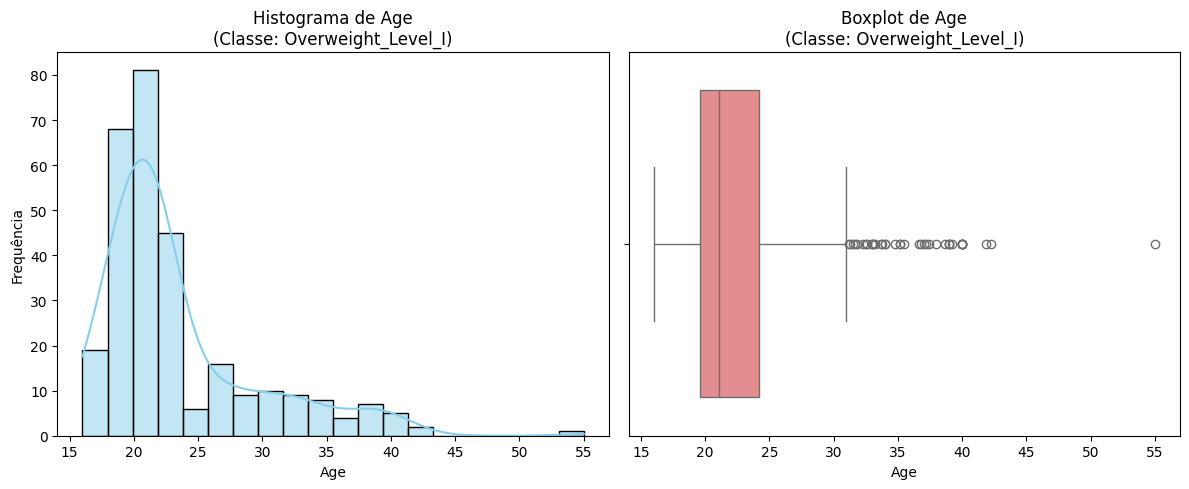

üìà Estat√≠sticas de 'Age' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 23.42
   Desvio padr√£o (œÉ): 6.13
   Assimetria (Œ≥): 1.69
--------------------------------------------------

--- Analisando 'Age' para a Classe: Overweight_Level_II ---


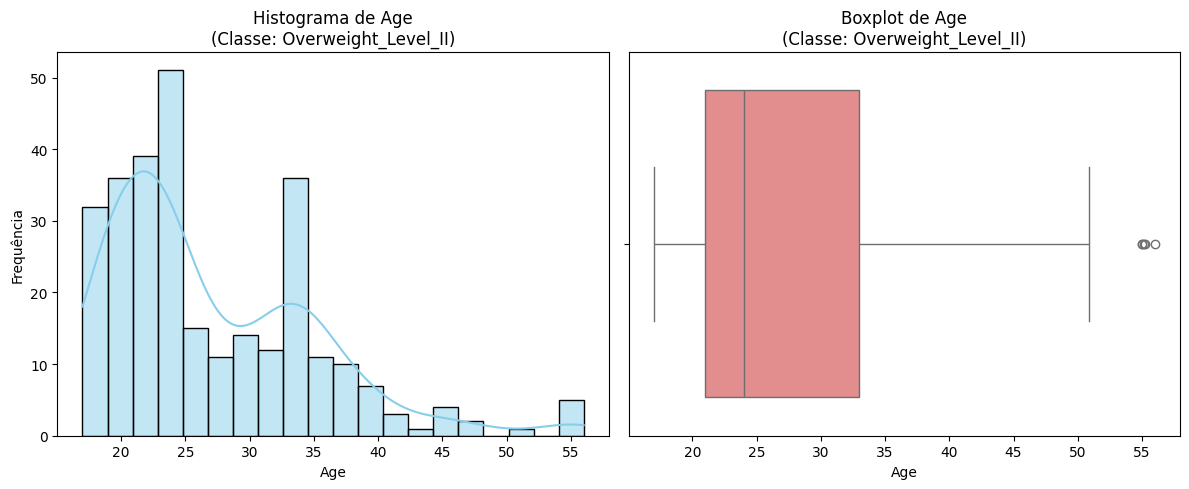

üìà Estat√≠sticas de 'Age' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 27.00
   Desvio padr√£o (œÉ): 8.06
   Assimetria (Œ≥): 1.18
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: HEIGHT =========================

--- Analisando 'Height' para a Classe: Insufficient_Weight ---


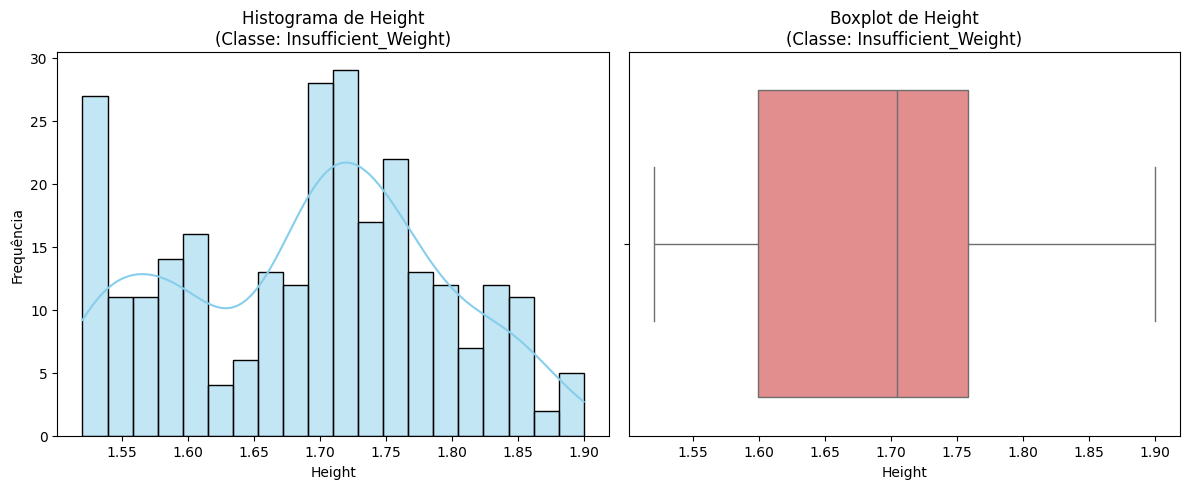

üìà Estat√≠sticas de 'Height' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 1.69
   Desvio padr√£o (œÉ): 0.10
   Assimetria (Œ≥): -0.10
--------------------------------------------------

--- Analisando 'Height' para a Classe: Normal_Weight ---


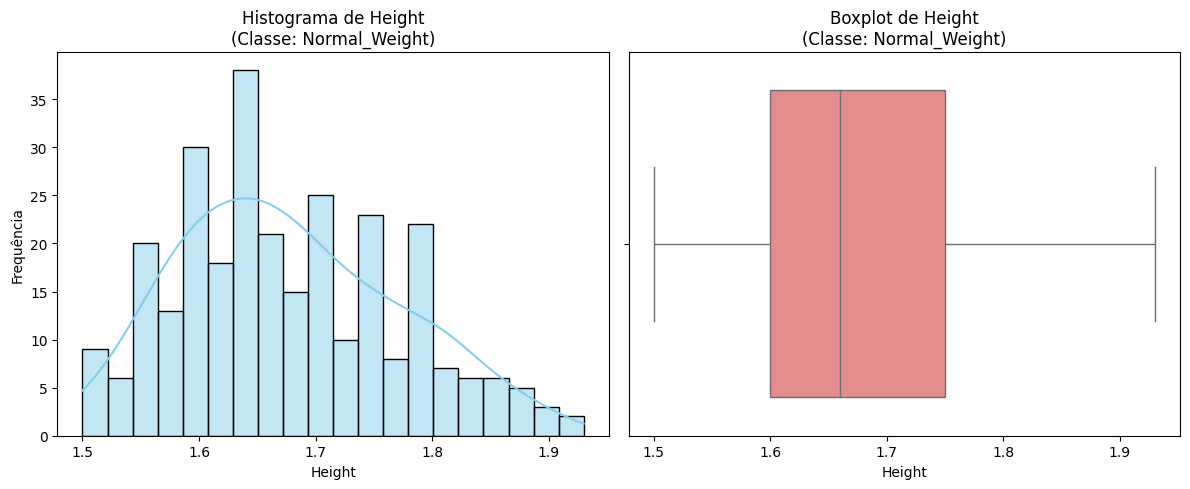

üìà Estat√≠sticas de 'Height' para a classe 'Normal_Weight':
   M√©dia (Œº): 1.68
   Desvio padr√£o (œÉ): 0.09
   Assimetria (Œ≥): 0.37
--------------------------------------------------

--- Analisando 'Height' para a Classe: Obesity_Type_I ---


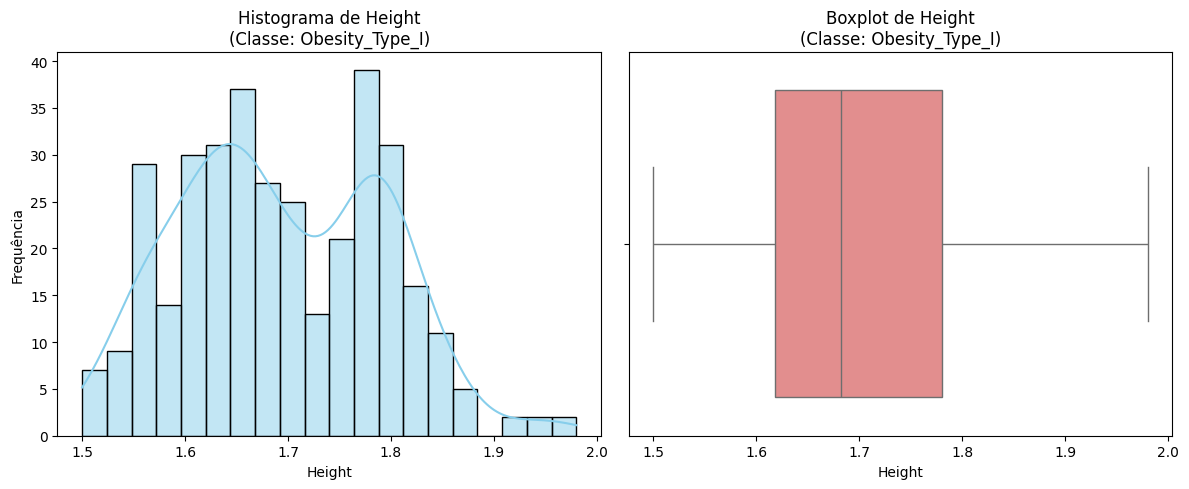

üìà Estat√≠sticas de 'Height' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 1.69
   Desvio padr√£o (œÉ): 0.10
   Assimetria (Œ≥): 0.22
--------------------------------------------------

--- Analisando 'Height' para a Classe: Obesity_Type_II ---


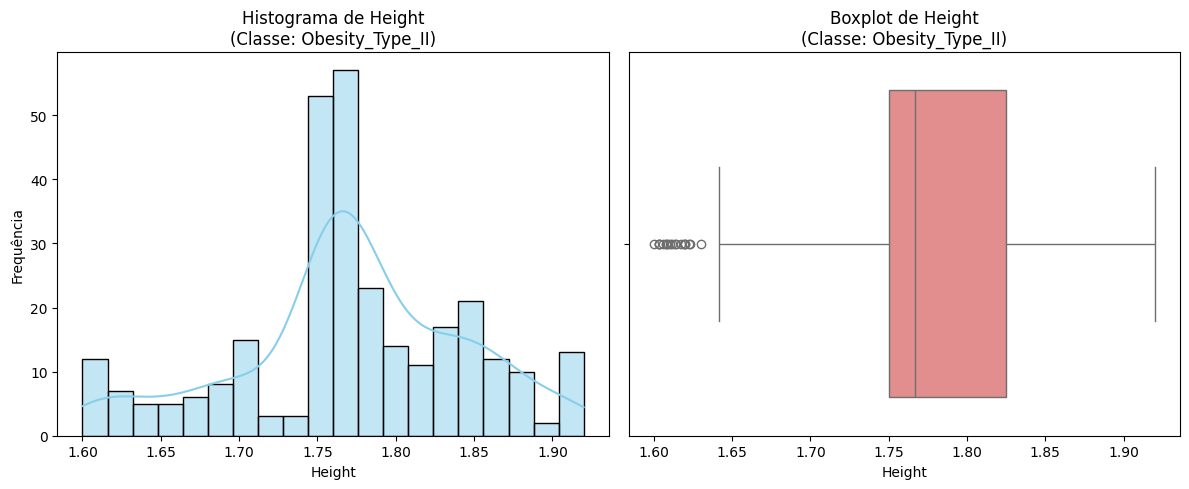

üìà Estat√≠sticas de 'Height' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 1.77
   Desvio padr√£o (œÉ): 0.07
   Assimetria (Œ≥): -0.32
--------------------------------------------------

--- Analisando 'Height' para a Classe: Obesity_Type_III ---


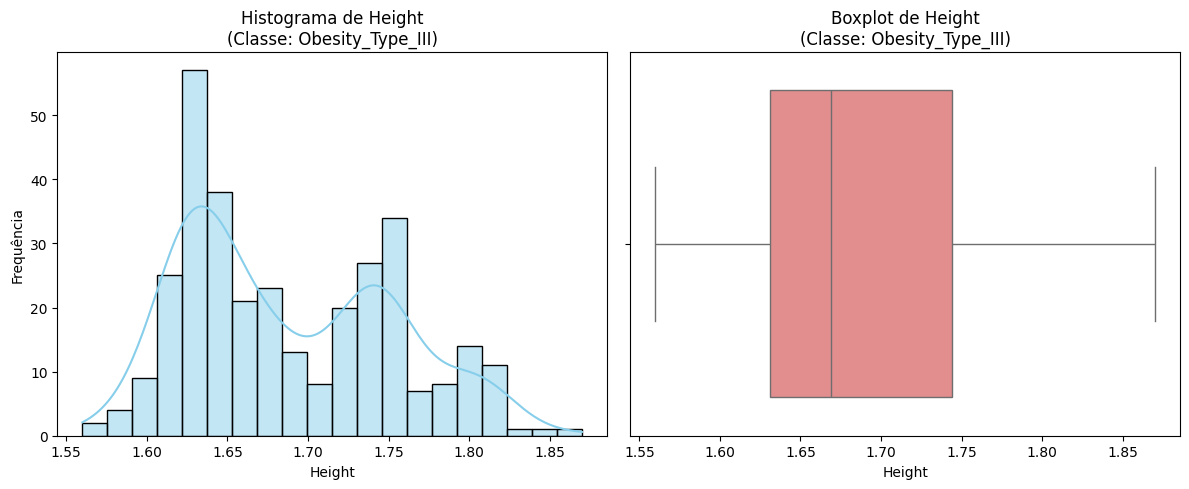

üìà Estat√≠sticas de 'Height' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 1.69
   Desvio padr√£o (œÉ): 0.07
   Assimetria (Œ≥): 0.44
--------------------------------------------------

--- Analisando 'Height' para a Classe: Overweight_Level_I ---


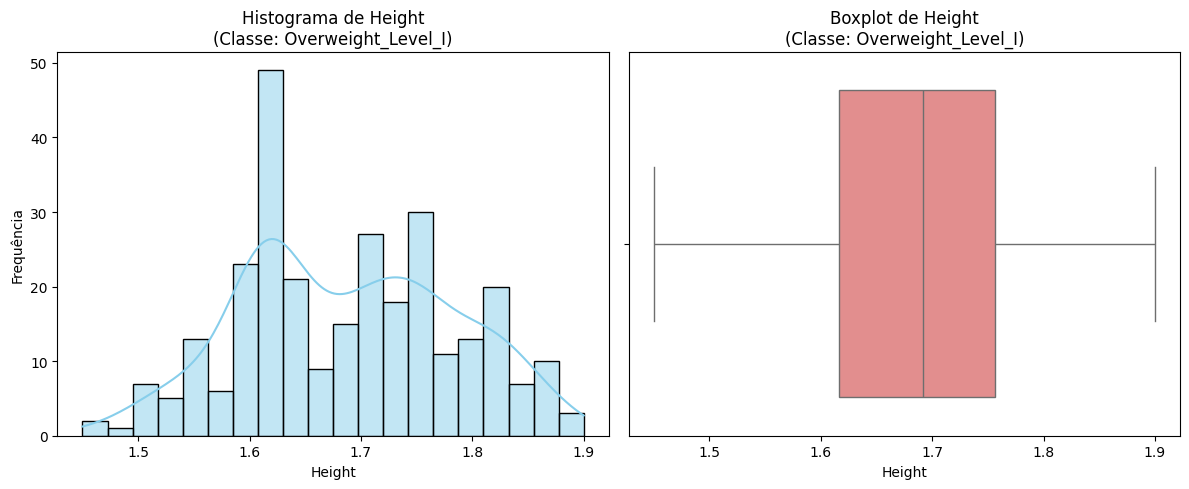

üìà Estat√≠sticas de 'Height' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 1.69
   Desvio padr√£o (œÉ): 0.10
   Assimetria (Œ≥): 0.04
--------------------------------------------------

--- Analisando 'Height' para a Classe: Overweight_Level_II ---


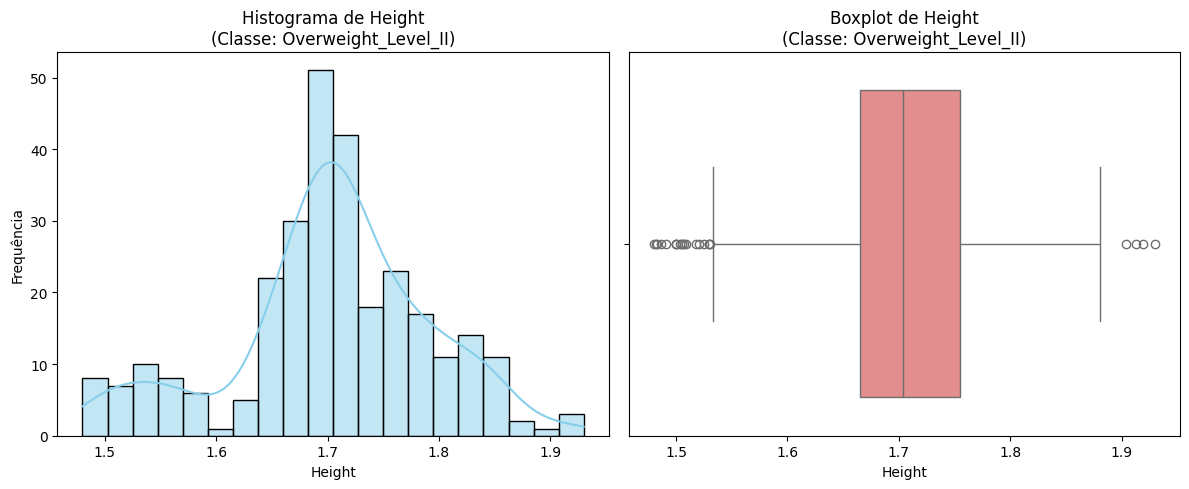

üìà Estat√≠sticas de 'Height' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 1.70
   Desvio padr√£o (œÉ): 0.09
   Assimetria (Œ≥): -0.40
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: WEIGHT =========================

--- Analisando 'Weight' para a Classe: Insufficient_Weight ---


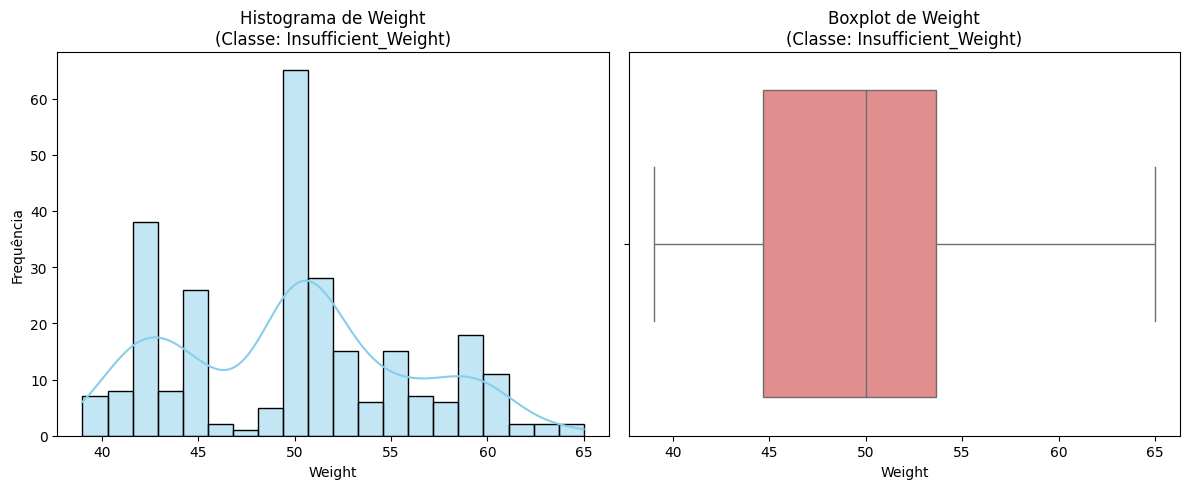

üìà Estat√≠sticas de 'Weight' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 49.91
   Desvio padr√£o (œÉ): 6.01
   Assimetria (Œ≥): 0.19
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Normal_Weight ---


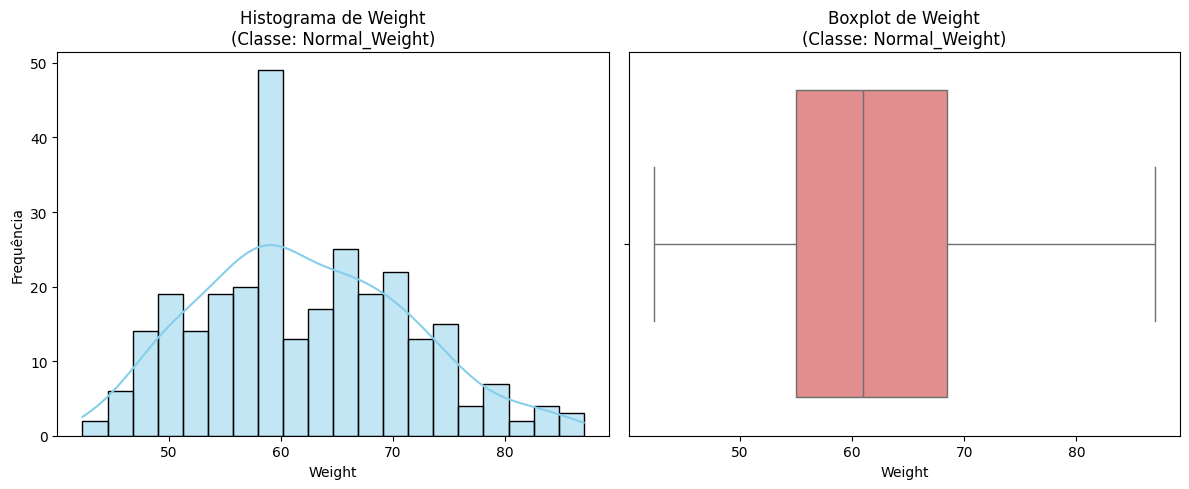

üìà Estat√≠sticas de 'Weight' para a classe 'Normal_Weight':
   M√©dia (Œº): 62.16
   Desvio padr√£o (œÉ): 9.30
   Assimetria (Œ≥): 0.30
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Obesity_Type_I ---


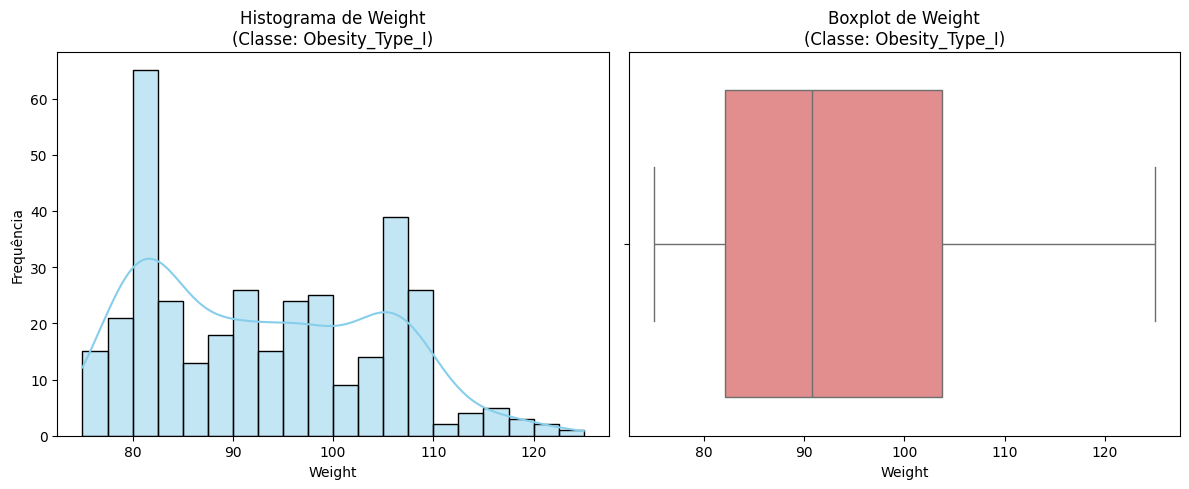

üìà Estat√≠sticas de 'Weight' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 92.87
   Desvio padr√£o (œÉ): 11.49
   Assimetria (Œ≥): 0.35
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Obesity_Type_II ---


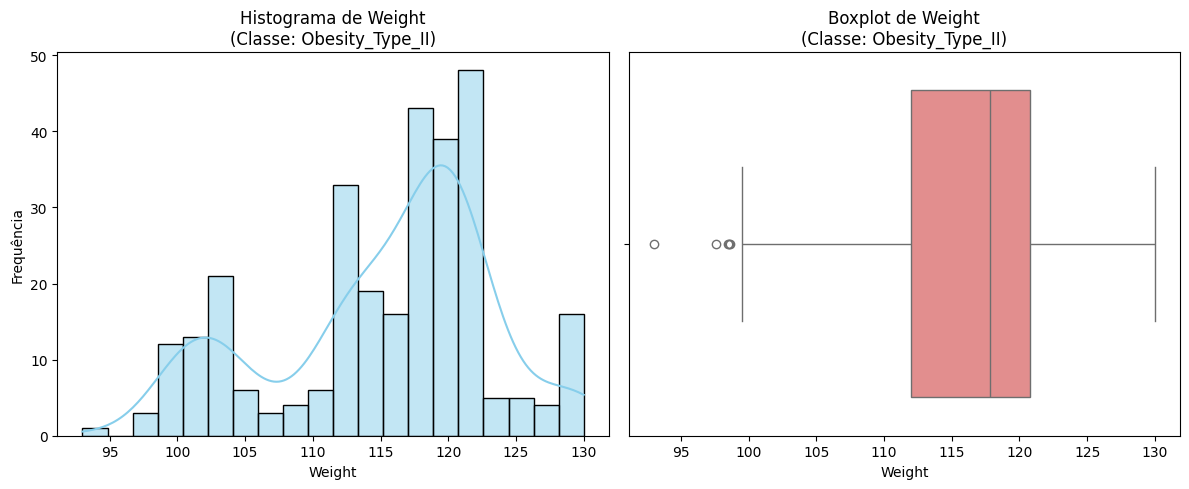

üìà Estat√≠sticas de 'Weight' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 115.31
   Desvio padr√£o (œÉ): 8.02
   Assimetria (Œ≥): -0.55
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Obesity_Type_III ---


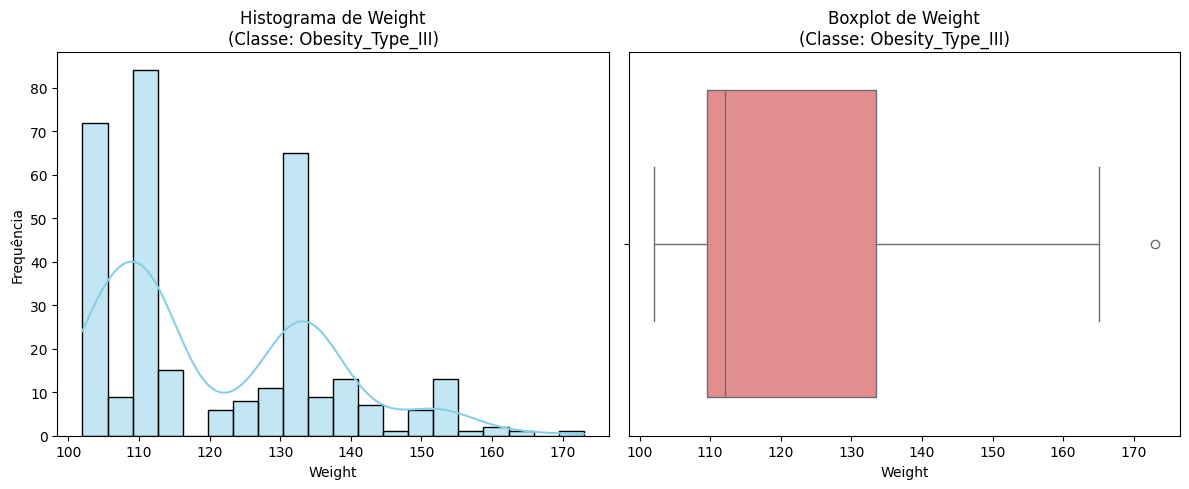

üìà Estat√≠sticas de 'Weight' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 120.94
   Desvio padr√£o (œÉ): 15.53
   Assimetria (Œ≥): 0.69
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Overweight_Level_I ---


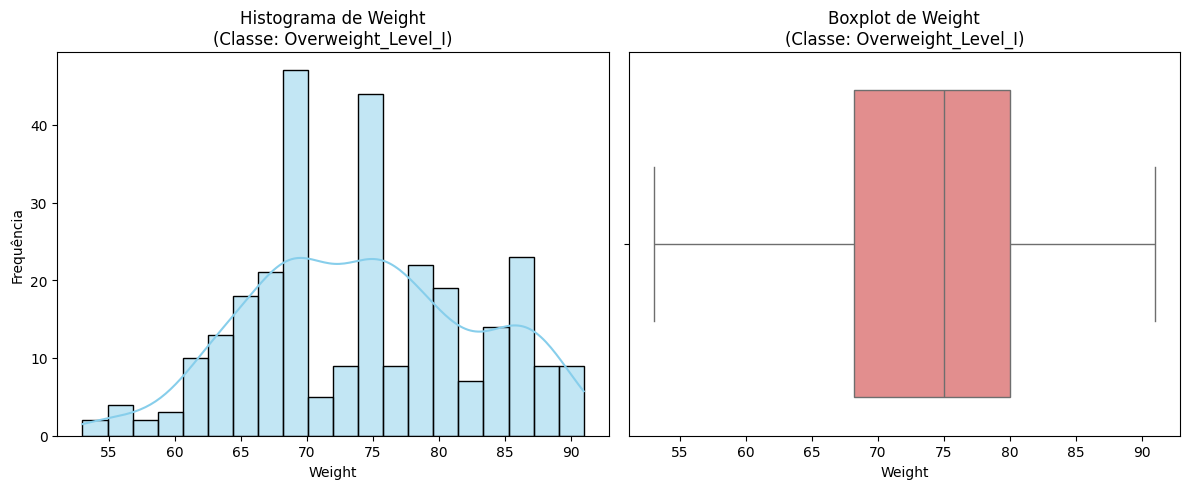

üìà Estat√≠sticas de 'Weight' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 74.27
   Desvio padr√£o (œÉ): 8.47
   Assimetria (Œ≥): 0.01
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Overweight_Level_II ---


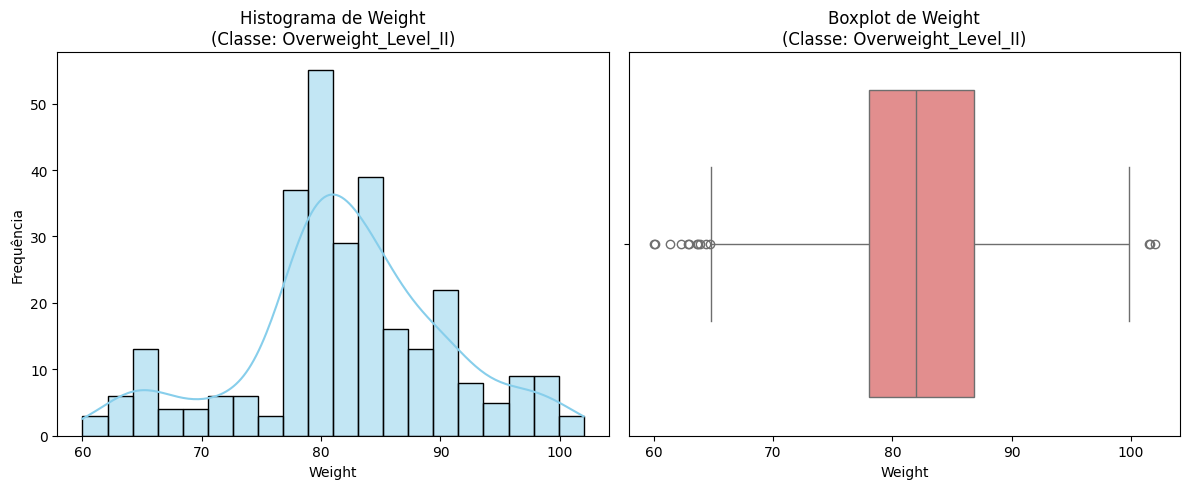

üìà Estat√≠sticas de 'Weight' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 82.09
   Desvio padr√£o (œÉ): 8.45
   Assimetria (Œ≥): -0.23
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: FCVC =========================

--- Analisando 'FCVC' para a Classe: Insufficient_Weight ---


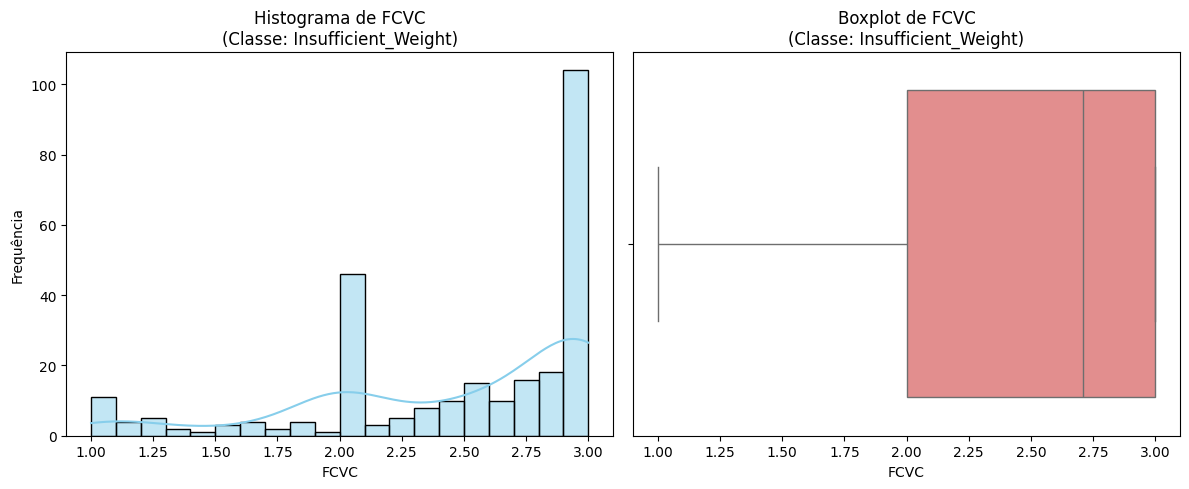

üìà Estat√≠sticas de 'FCVC' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 2.48
   Desvio padr√£o (œÉ): 0.58
   Assimetria (Œ≥): -1.01
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Normal_Weight ---


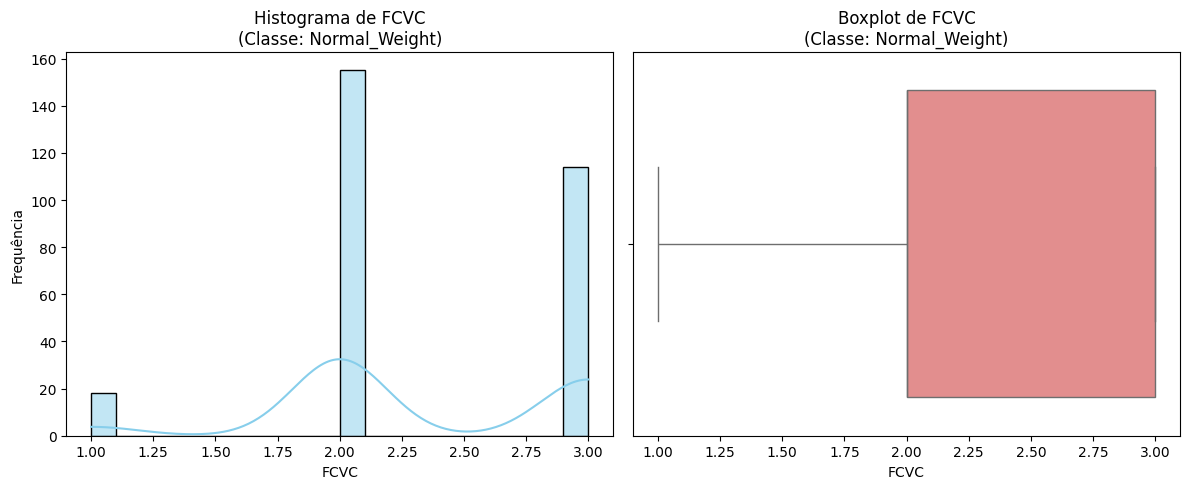

üìà Estat√≠sticas de 'FCVC' para a classe 'Normal_Weight':
   M√©dia (Œº): 2.33
   Desvio padr√£o (œÉ): 0.59
   Assimetria (Œ≥): -0.25
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Obesity_Type_I ---


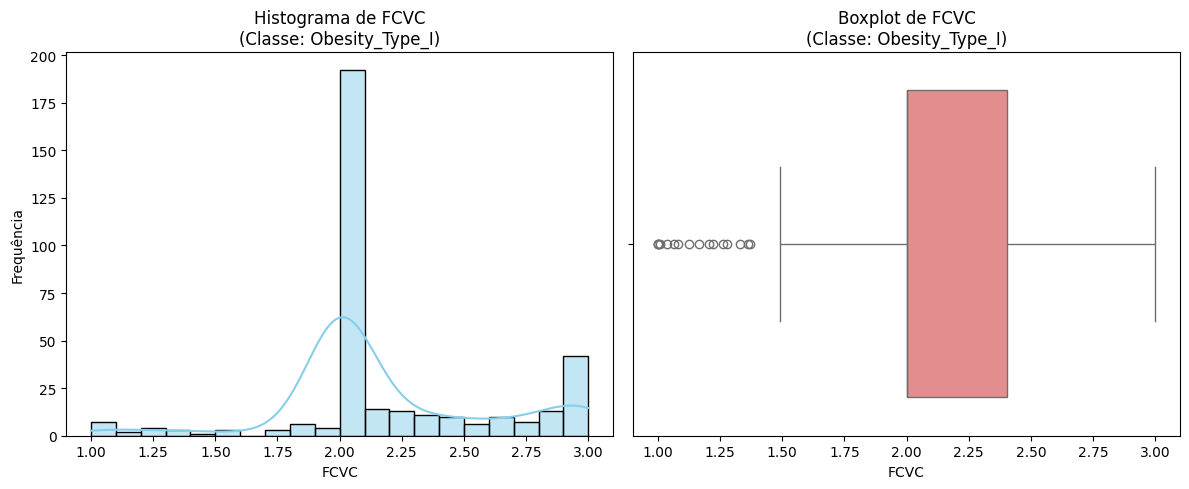

üìà Estat√≠sticas de 'FCVC' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 2.19
   Desvio padr√£o (œÉ): 0.43
   Assimetria (Œ≥): 0.23
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Obesity_Type_II ---


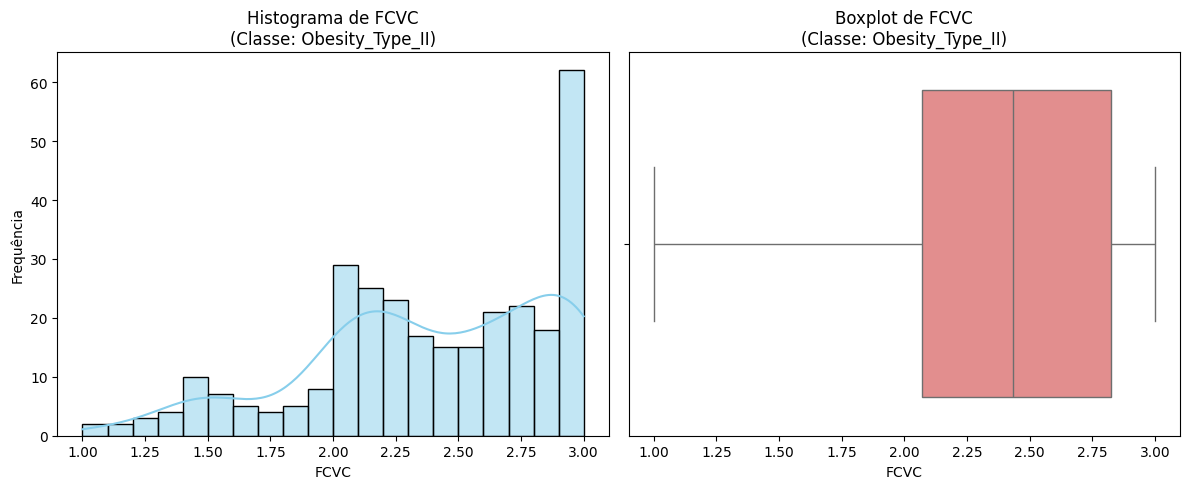

üìà Estat√≠sticas de 'FCVC' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 2.39
   Desvio padr√£o (œÉ): 0.49
   Assimetria (Œ≥): -0.59
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Obesity_Type_III ---


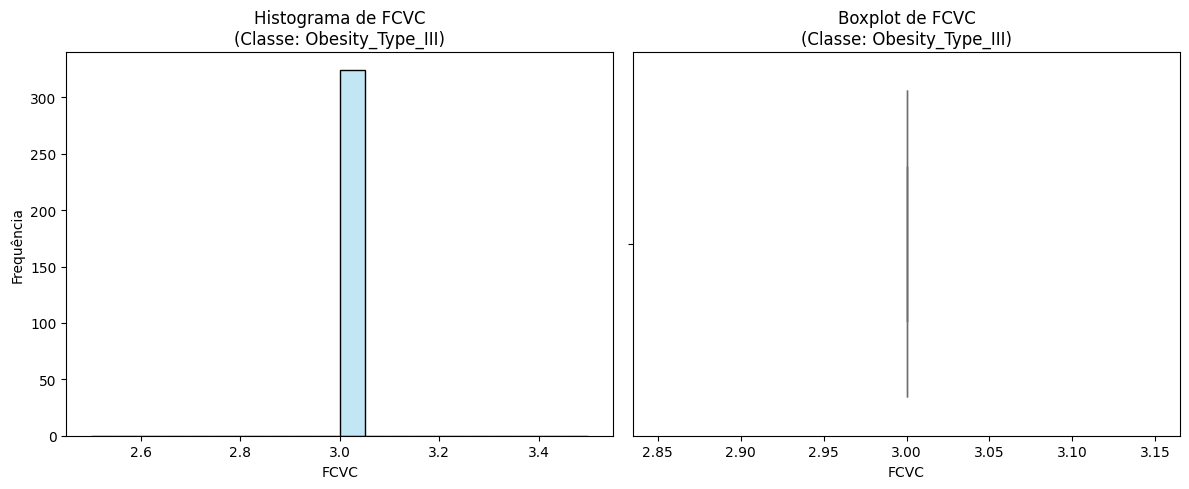

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\3870966219.py:44: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(subset_data[col].dropna())


üìà Estat√≠sticas de 'FCVC' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 3.00
   Desvio padr√£o (œÉ): 0.00
   Assimetria (Œ≥): nan
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Overweight_Level_I ---


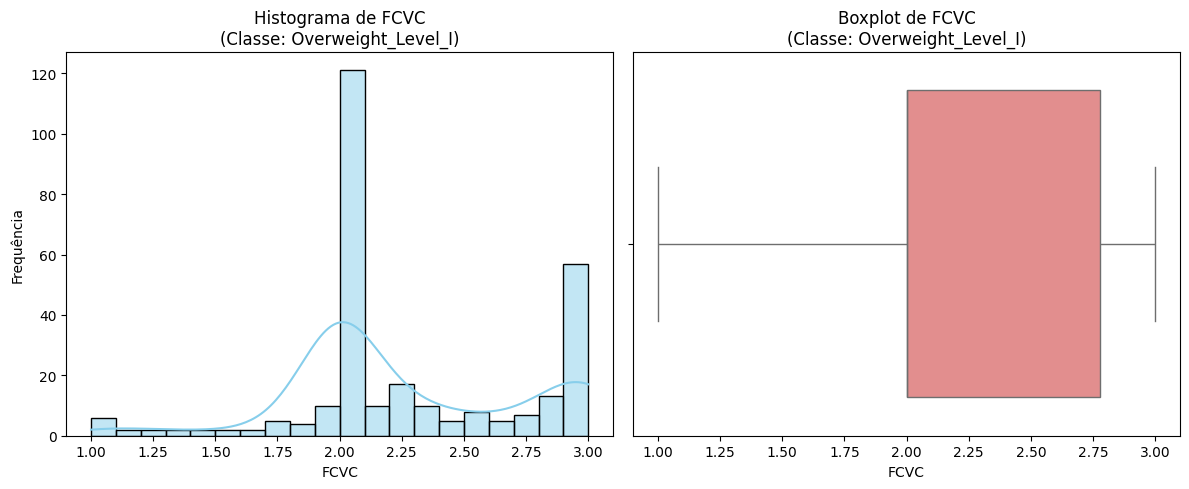

üìà Estat√≠sticas de 'FCVC' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 2.26
   Desvio padr√£o (œÉ): 0.48
   Assimetria (Œ≥): 0.05
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Overweight_Level_II ---


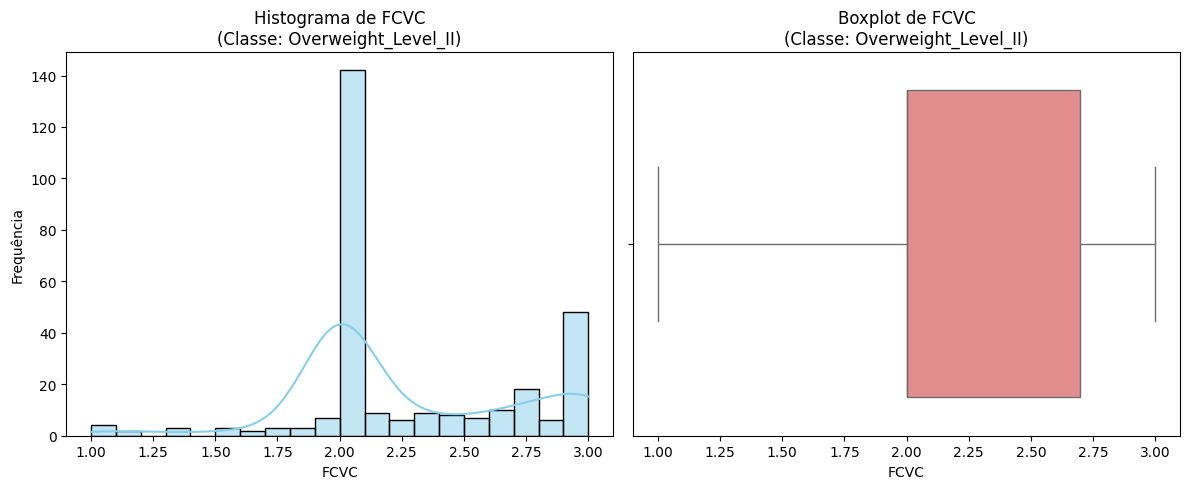

üìà Estat√≠sticas de 'FCVC' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 2.26
   Desvio padr√£o (œÉ): 0.45
   Assimetria (Œ≥): 0.19
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: NCP =========================

--- Analisando 'NCP' para a Classe: Insufficient_Weight ---


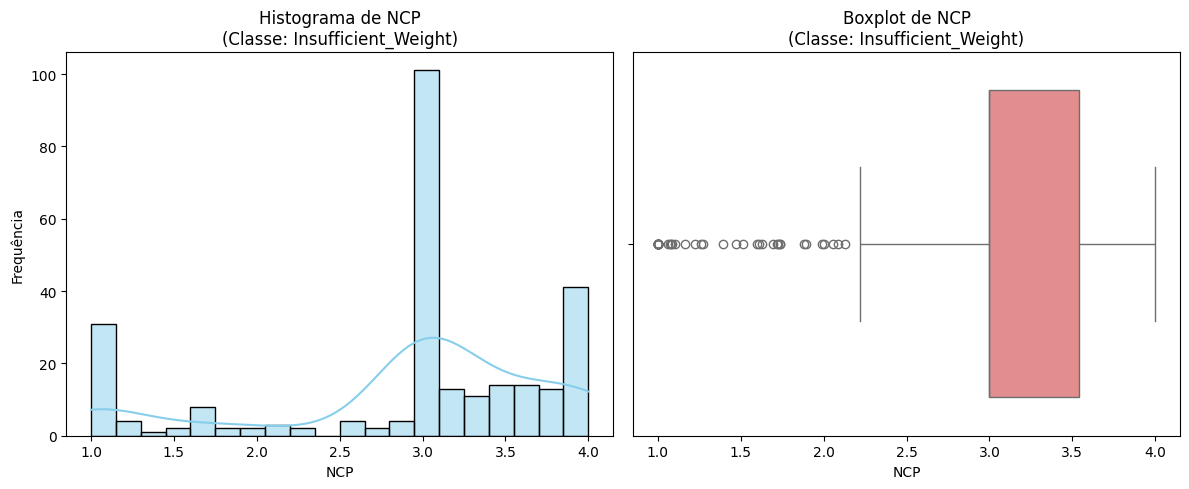

üìà Estat√≠sticas de 'NCP' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 2.91
   Desvio padr√£o (œÉ): 0.90
   Assimetria (Œ≥): -0.99
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Normal_Weight ---


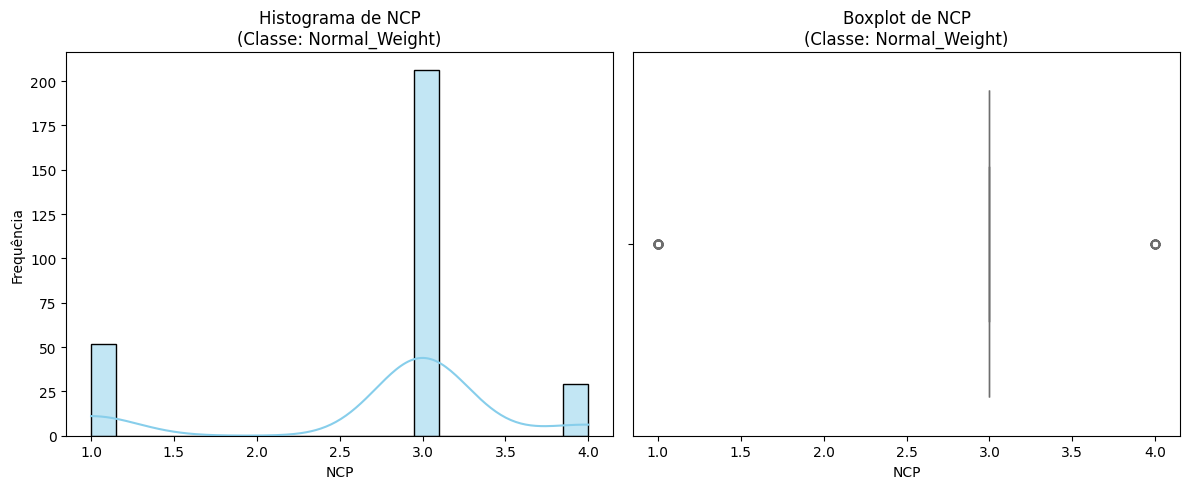

üìà Estat√≠sticas de 'NCP' para a classe 'Normal_Weight':
   M√©dia (Œº): 2.74
   Desvio padr√£o (œÉ): 0.87
   Assimetria (Œ≥): -1.12
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Obesity_Type_I ---


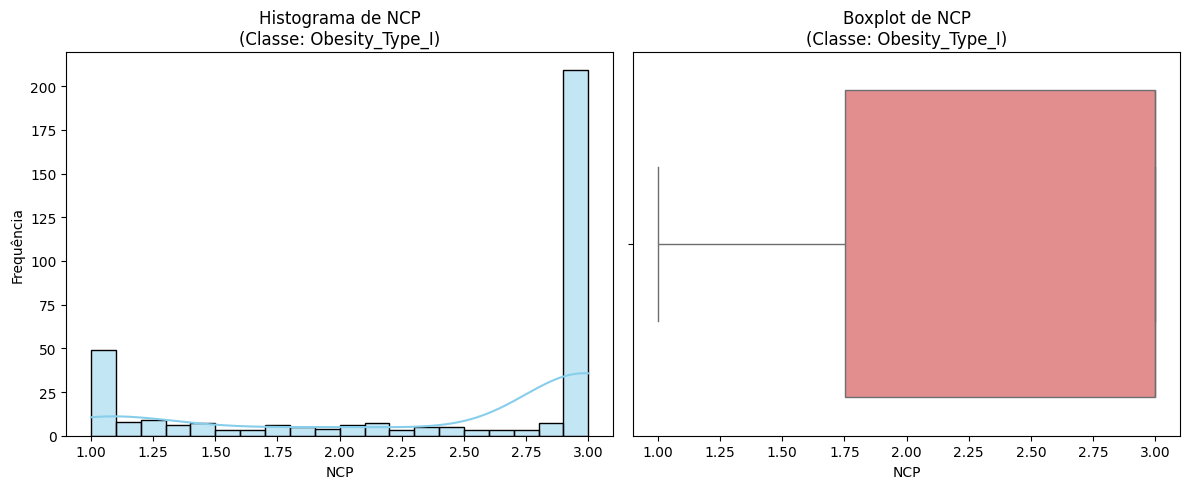

üìà Estat√≠sticas de 'NCP' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 2.43
   Desvio padr√£o (œÉ): 0.79
   Assimetria (Œ≥): -0.91
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Obesity_Type_II ---


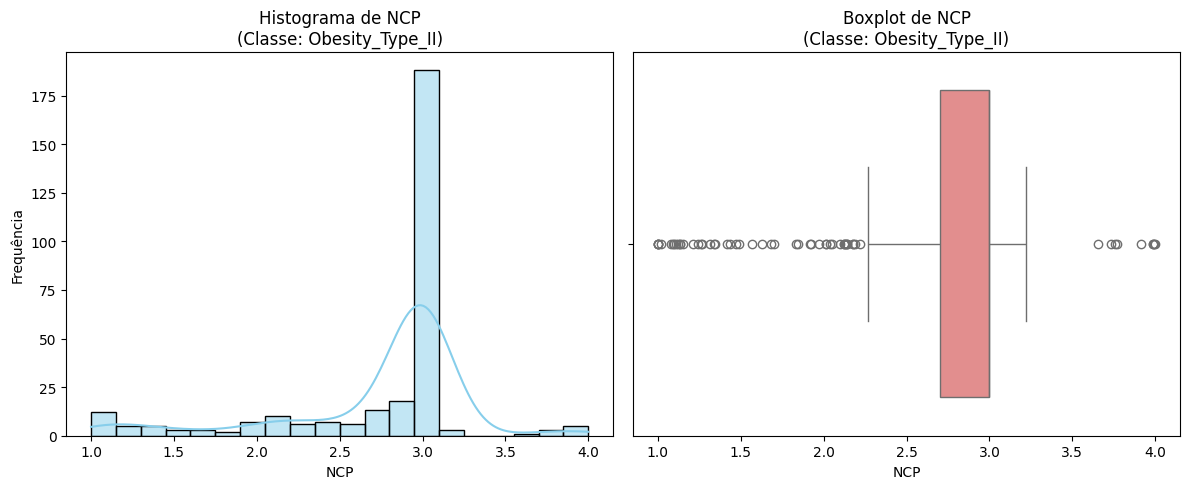

üìà Estat√≠sticas de 'NCP' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 2.74
   Desvio padr√£o (œÉ): 0.58
   Assimetria (Œ≥): -1.54
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Obesity_Type_III ---


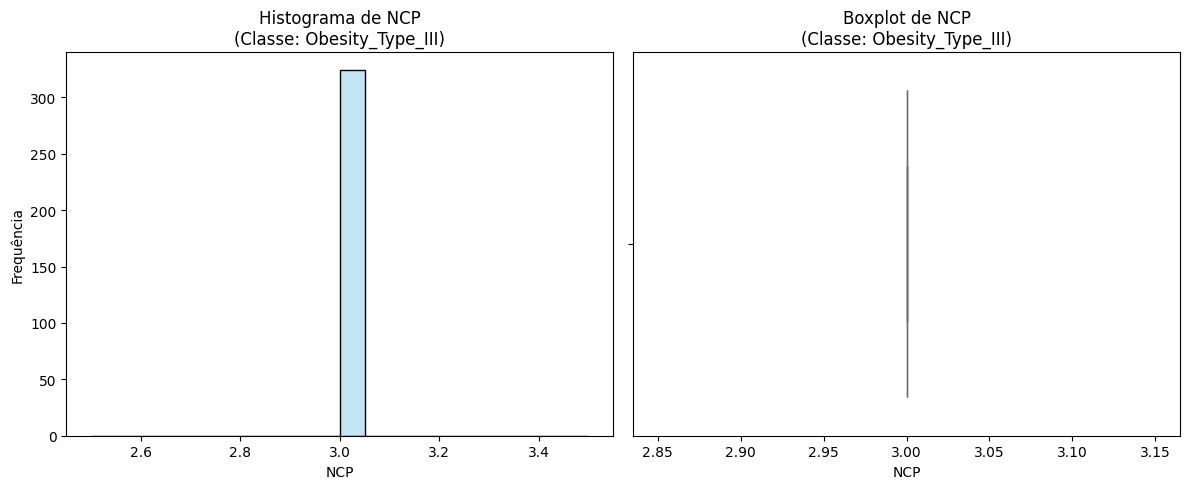

üìà Estat√≠sticas de 'NCP' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 3.00
   Desvio padr√£o (œÉ): 0.00
   Assimetria (Œ≥): nan
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Overweight_Level_I ---


C:\Users\diego\AppData\Local\Temp\ipykernel_12956\3870966219.py:44: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(subset_data[col].dropna())


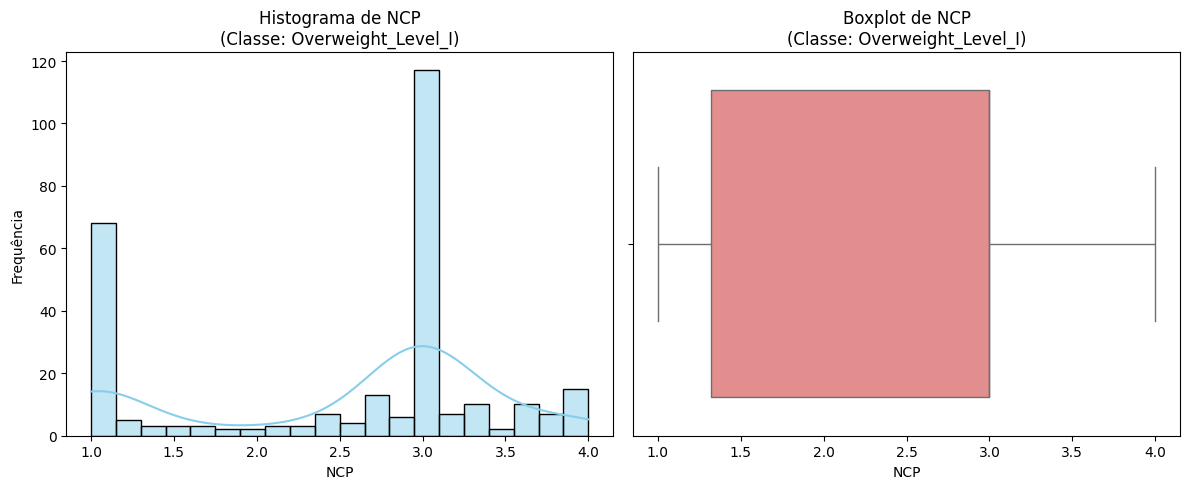

üìà Estat√≠sticas de 'NCP' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 2.50
   Desvio padr√£o (œÉ): 0.96
   Assimetria (Œ≥): -0.55
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Overweight_Level_II ---


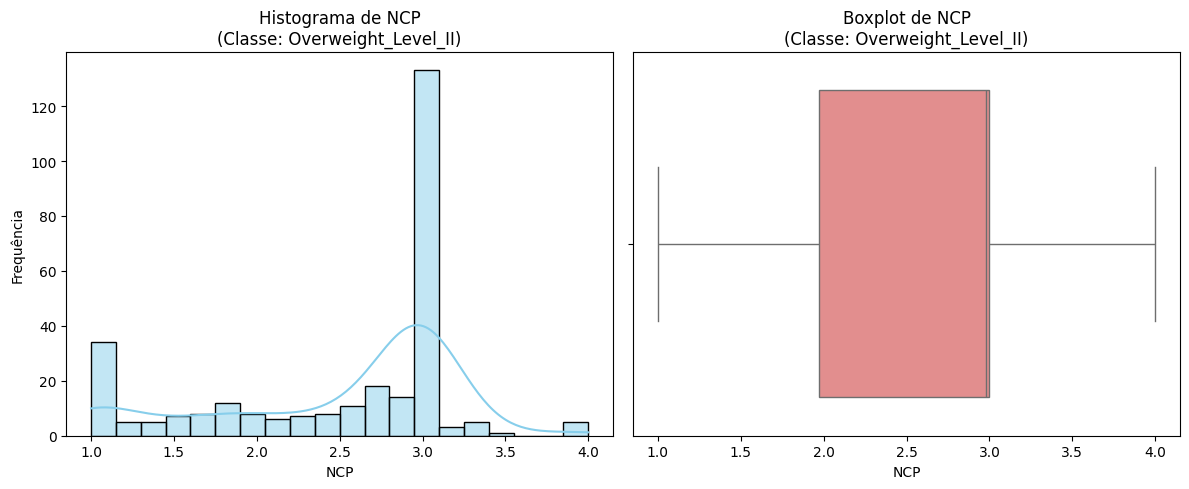

üìà Estat√≠sticas de 'NCP' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 2.50
   Desvio padr√£o (œÉ): 0.75
   Assimetria (Œ≥): -0.87
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: CH2O =========================

--- Analisando 'CH2O' para a Classe: Insufficient_Weight ---


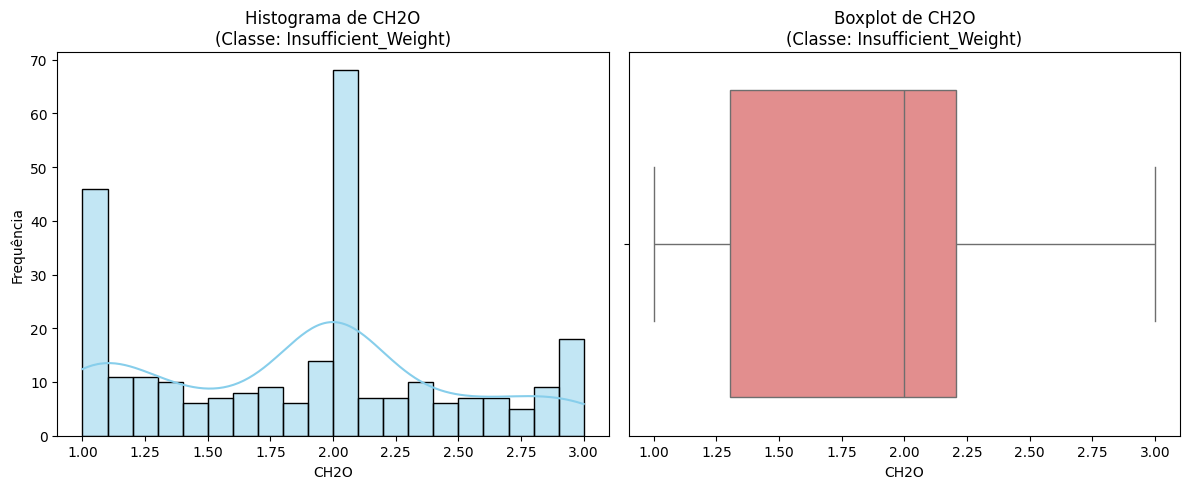

üìà Estat√≠sticas de 'CH2O' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 1.87
   Desvio padr√£o (œÉ): 0.60
   Assimetria (Œ≥): 0.12
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Normal_Weight ---


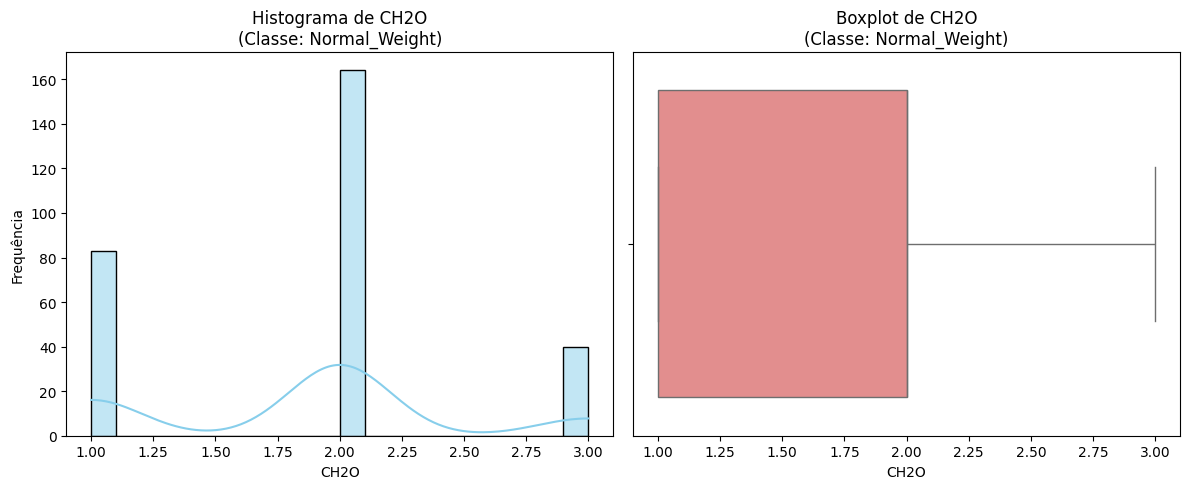

üìà Estat√≠sticas de 'CH2O' para a classe 'Normal_Weight':
   M√©dia (Œº): 1.85
   Desvio padr√£o (œÉ): 0.64
   Assimetria (Œ≥): 0.14
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Obesity_Type_I ---


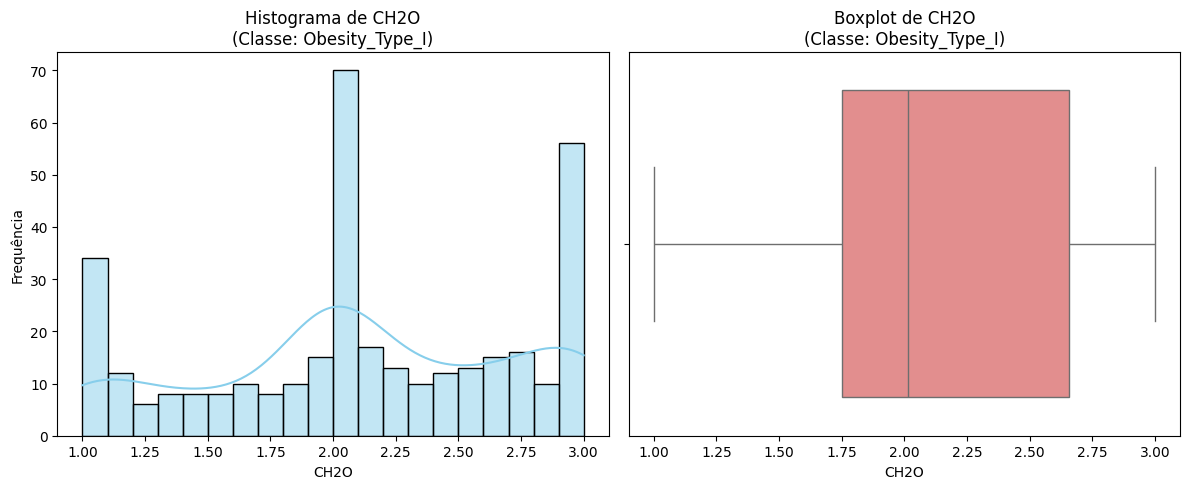

üìà Estat√≠sticas de 'CH2O' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 2.11
   Desvio padr√£o (œÉ): 0.62
   Assimetria (Œ≥): -0.21
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Obesity_Type_II ---


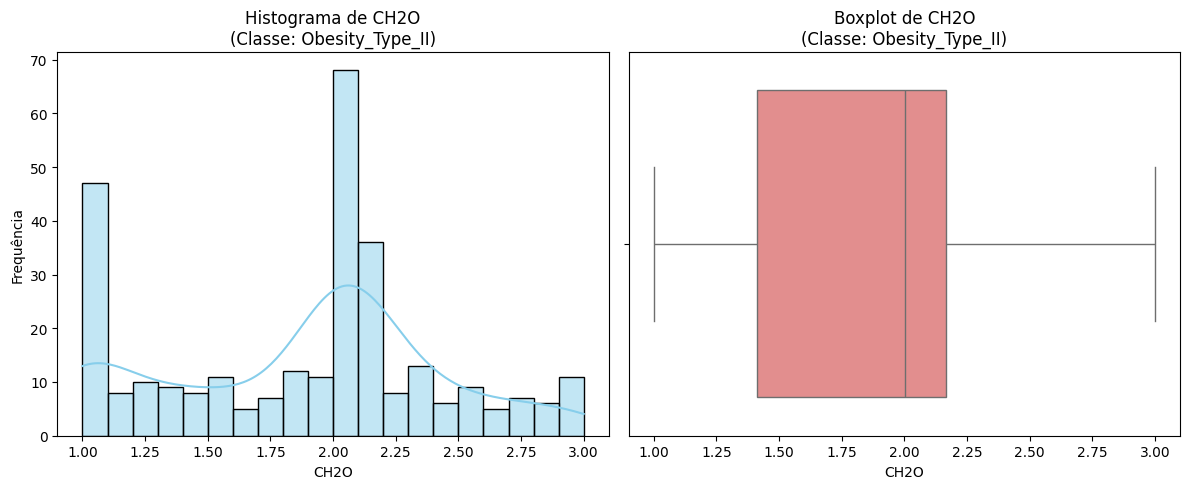

üìà Estat√≠sticas de 'CH2O' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 1.88
   Desvio padr√£o (œÉ): 0.55
   Assimetria (Œ≥): -0.13
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Obesity_Type_III ---


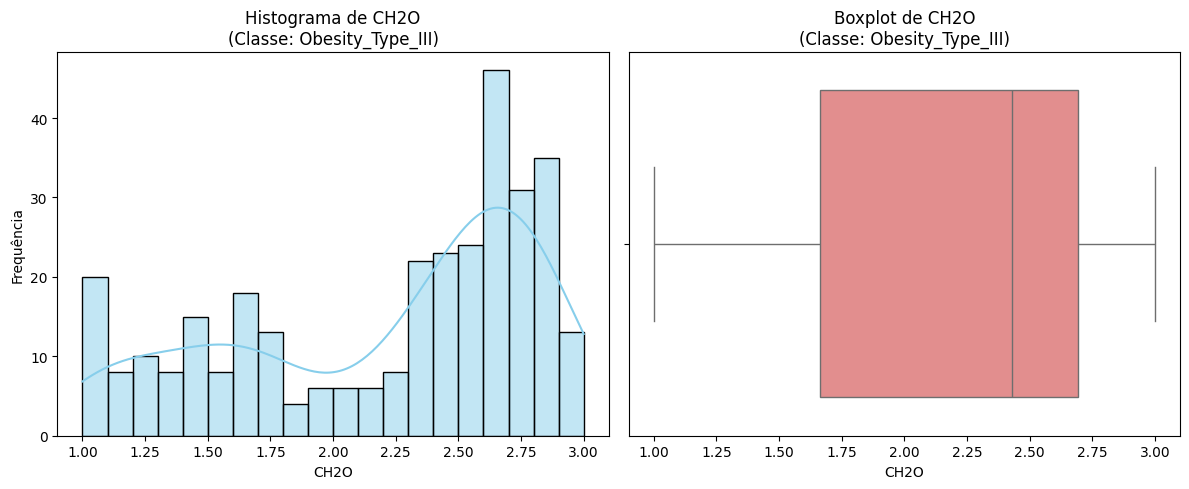

üìà Estat√≠sticas de 'CH2O' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 2.21
   Desvio padr√£o (œÉ): 0.60
   Assimetria (Œ≥): -0.64
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Overweight_Level_I ---


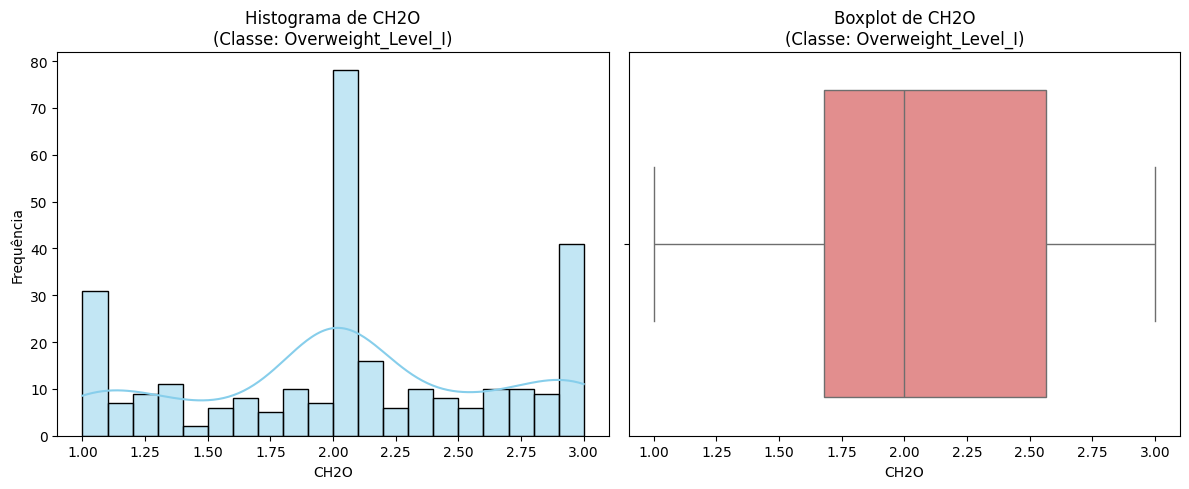

üìà Estat√≠sticas de 'CH2O' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 2.06
   Desvio padr√£o (œÉ): 0.62
   Assimetria (Œ≥): -0.09
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Overweight_Level_II ---


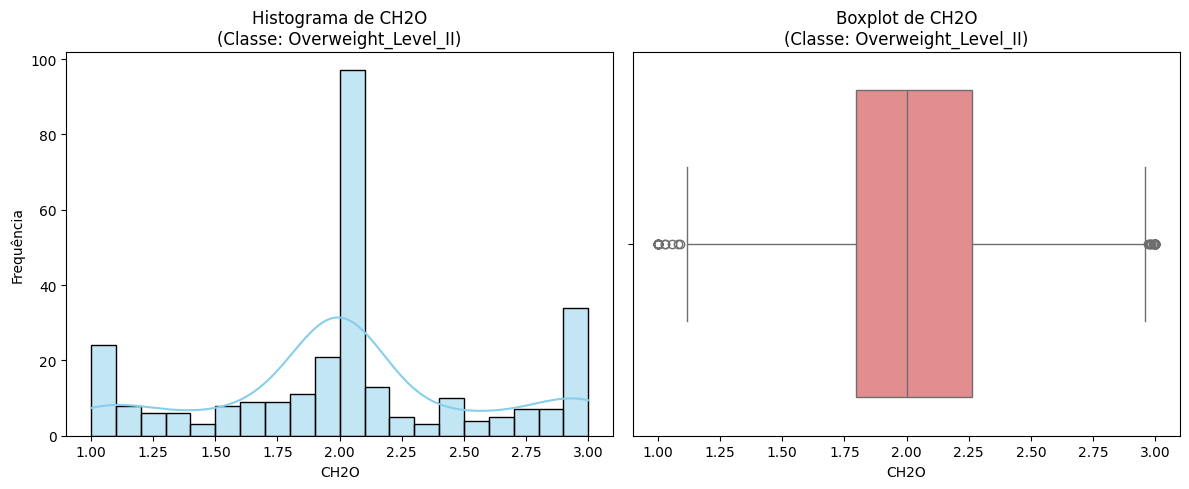

üìà Estat√≠sticas de 'CH2O' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 2.03
   Desvio padr√£o (œÉ): 0.55
   Assimetria (Œ≥): 0.05
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: FAF =========================

--- Analisando 'FAF' para a Classe: Insufficient_Weight ---


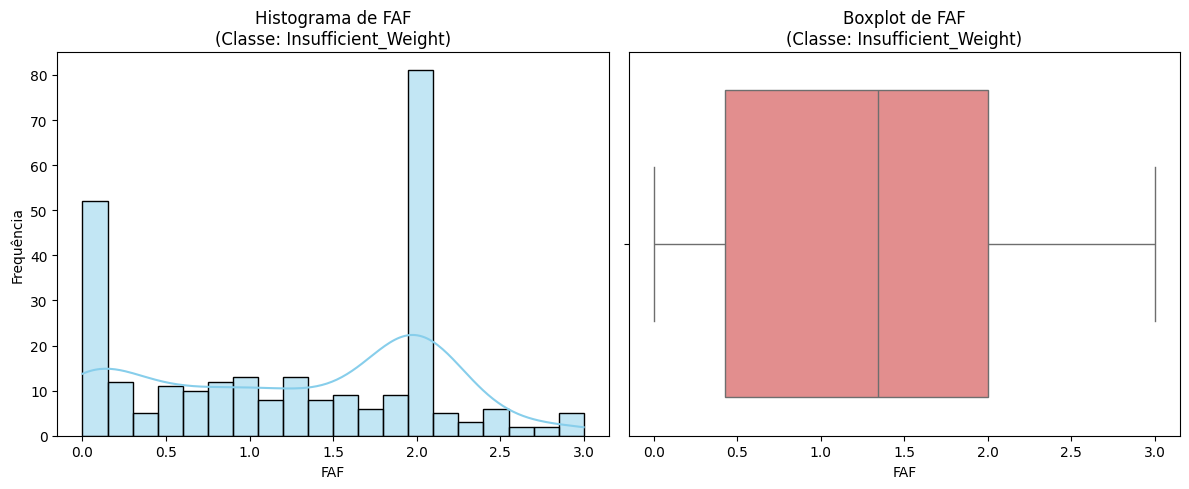

üìà Estat√≠sticas de 'FAF' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 1.25
   Desvio padr√£o (œÉ): 0.86
   Assimetria (Œ≥): -0.13
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Normal_Weight ---


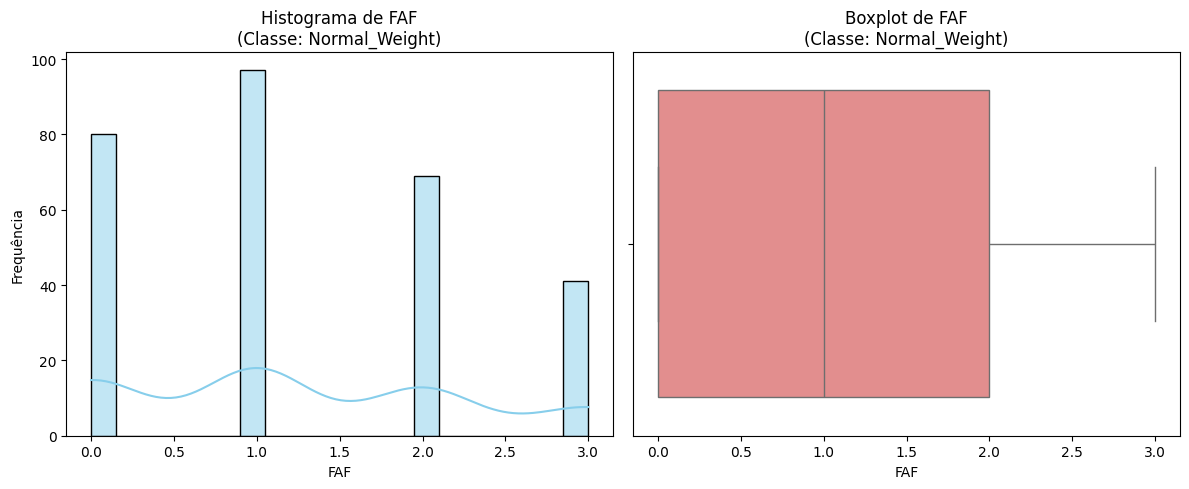

üìà Estat√≠sticas de 'FAF' para a classe 'Normal_Weight':
   M√©dia (Œº): 1.25
   Desvio padr√£o (œÉ): 1.02
   Assimetria (Œ≥): 0.31
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Obesity_Type_I ---


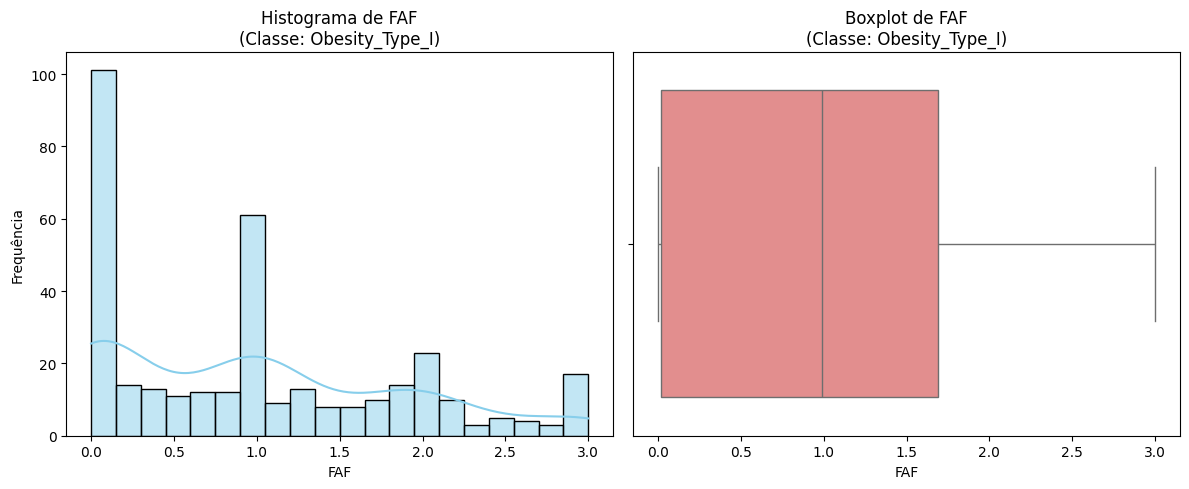

üìà Estat√≠sticas de 'FAF' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 0.99
   Desvio padr√£o (œÉ): 0.89
   Assimetria (Œ≥): 0.61
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Obesity_Type_II ---


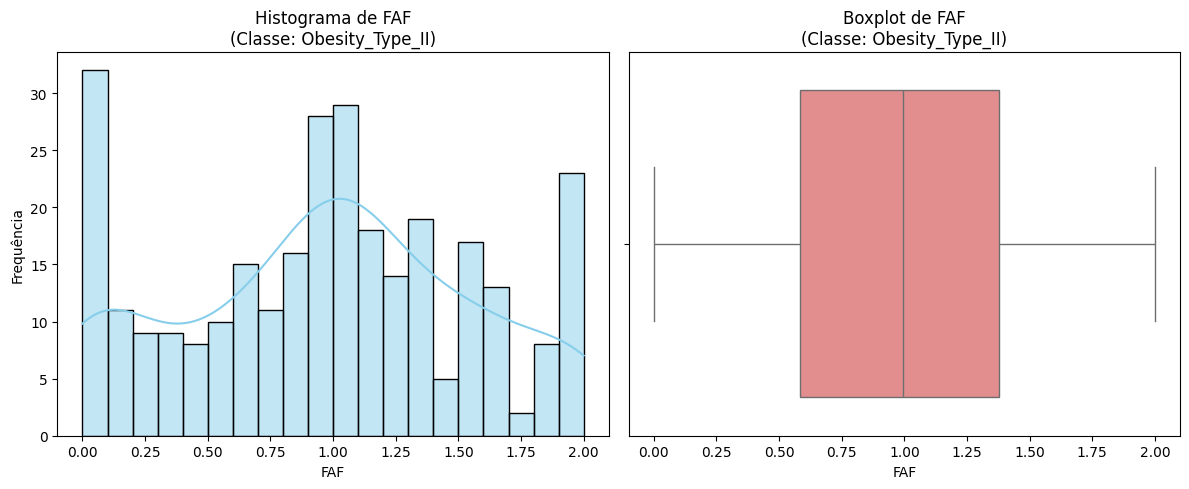

üìà Estat√≠sticas de 'FAF' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 0.97
   Desvio padr√£o (œÉ): 0.58
   Assimetria (Œ≥): -0.06
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Obesity_Type_III ---


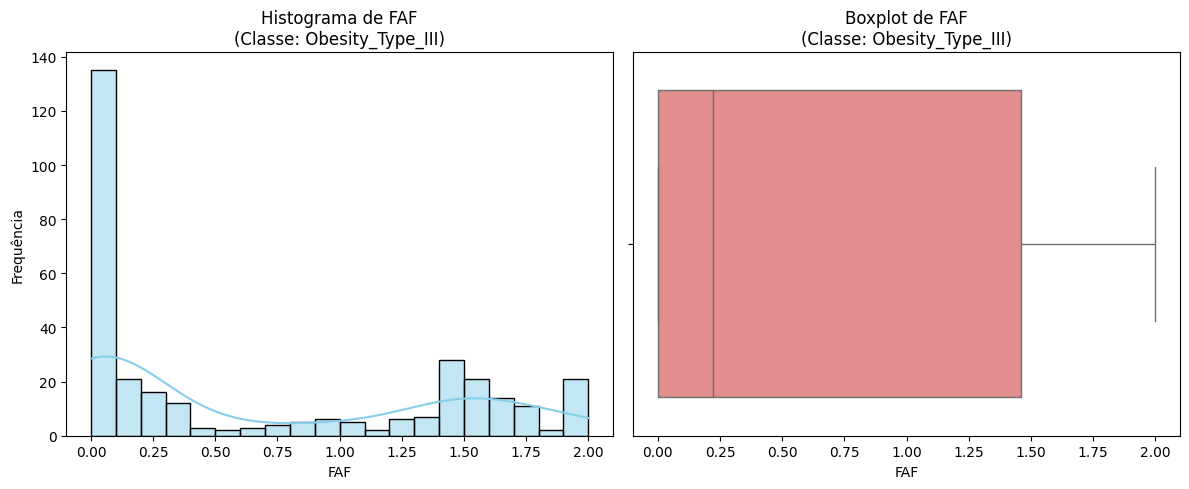

üìà Estat√≠sticas de 'FAF' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 0.66
   Desvio padr√£o (œÉ): 0.73
   Assimetria (Œ≥): 0.54
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Overweight_Level_I ---


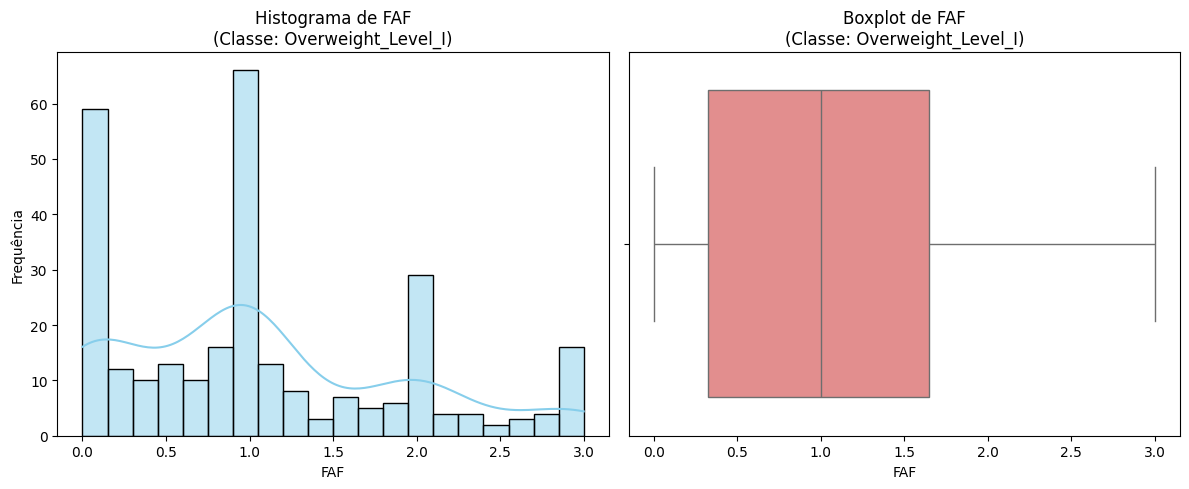

üìà Estat√≠sticas de 'FAF' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 1.06
   Desvio padr√£o (œÉ): 0.85
   Assimetria (Œ≥): 0.65
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Overweight_Level_II ---


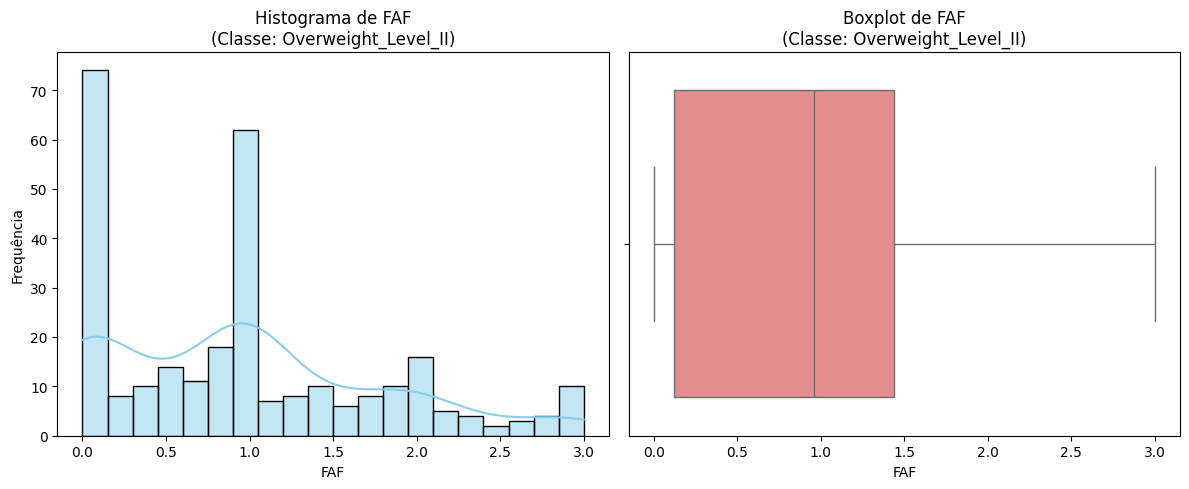

üìà Estat√≠sticas de 'FAF' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 0.96
   Desvio padr√£o (œÉ): 0.82
   Assimetria (Œ≥): 0.68
--------------------------------------------------


========================= AN√ÅLISE DA VARI√ÅVEL: TUE =========================

--- Analisando 'TUE' para a Classe: Insufficient_Weight ---


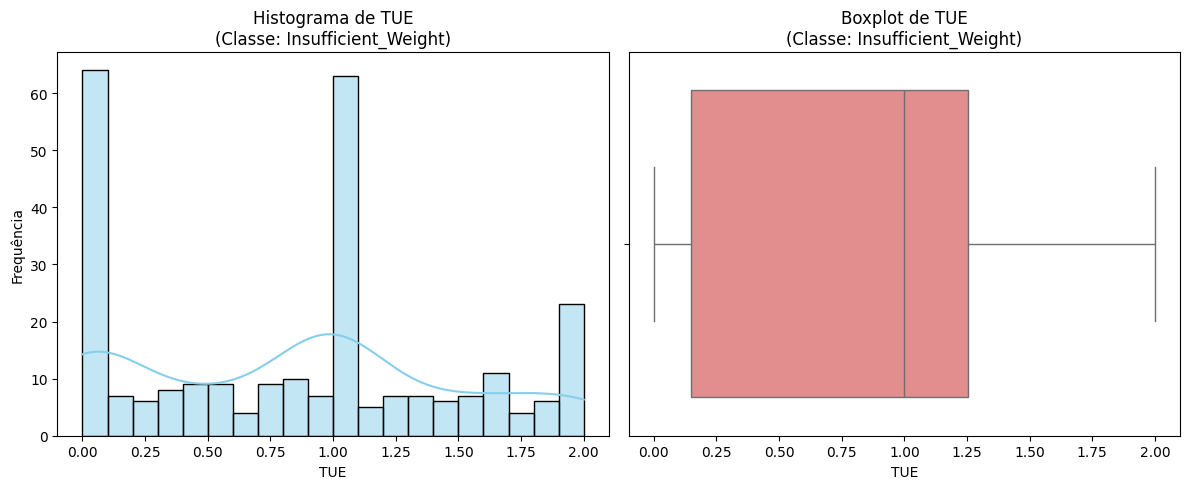

üìà Estat√≠sticas de 'TUE' para a classe 'Insufficient_Weight':
   M√©dia (Œº): 0.84
   Desvio padr√£o (œÉ): 0.64
   Assimetria (Œ≥): 0.20
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Normal_Weight ---


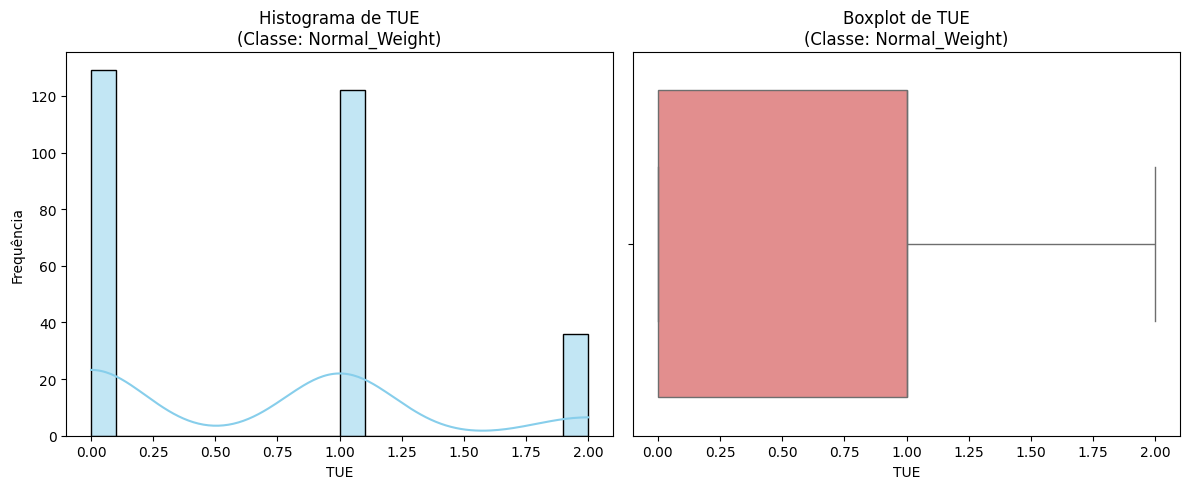

üìà Estat√≠sticas de 'TUE' para a classe 'Normal_Weight':
   M√©dia (Œº): 0.68
   Desvio padr√£o (œÉ): 0.69
   Assimetria (Œ≥): 0.52
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Obesity_Type_I ---


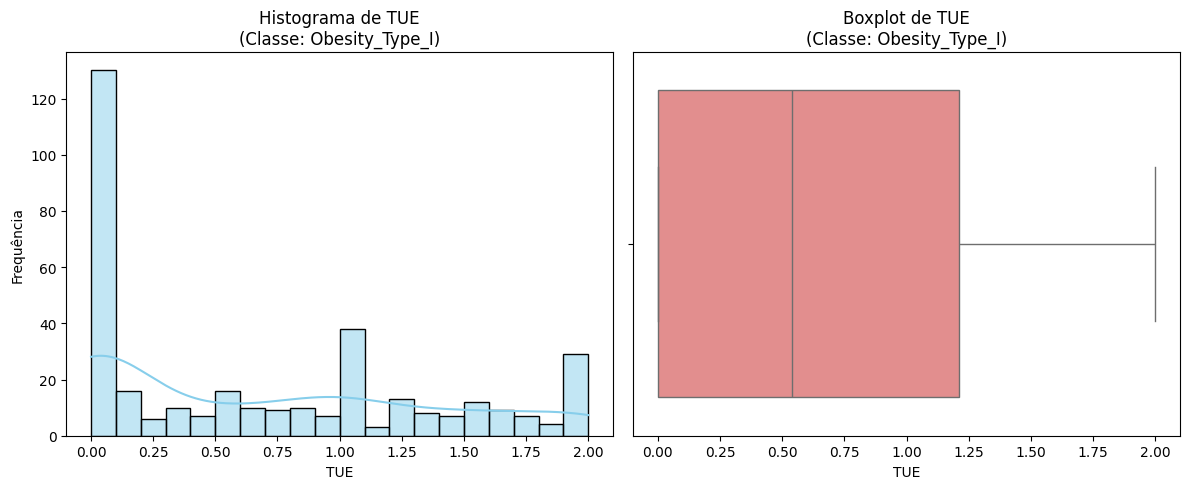

üìà Estat√≠sticas de 'TUE' para a classe 'Obesity_Type_I':
   M√©dia (Œº): 0.68
   Desvio padr√£o (œÉ): 0.69
   Assimetria (Œ≥): 0.56
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Obesity_Type_II ---


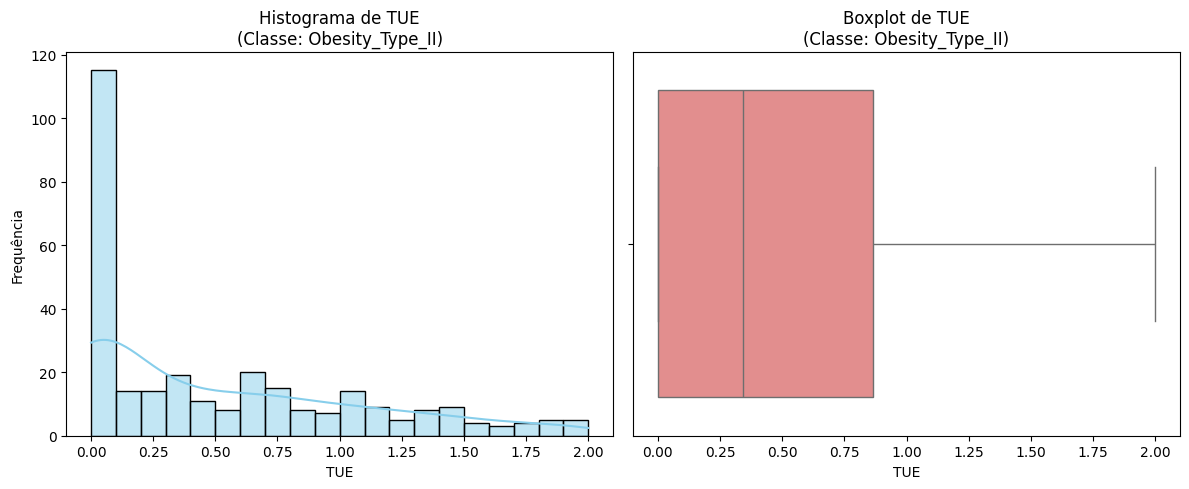

üìà Estat√≠sticas de 'TUE' para a classe 'Obesity_Type_II':
   M√©dia (Œº): 0.52
   Desvio padr√£o (œÉ): 0.56
   Assimetria (Œ≥): 0.91
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Obesity_Type_III ---


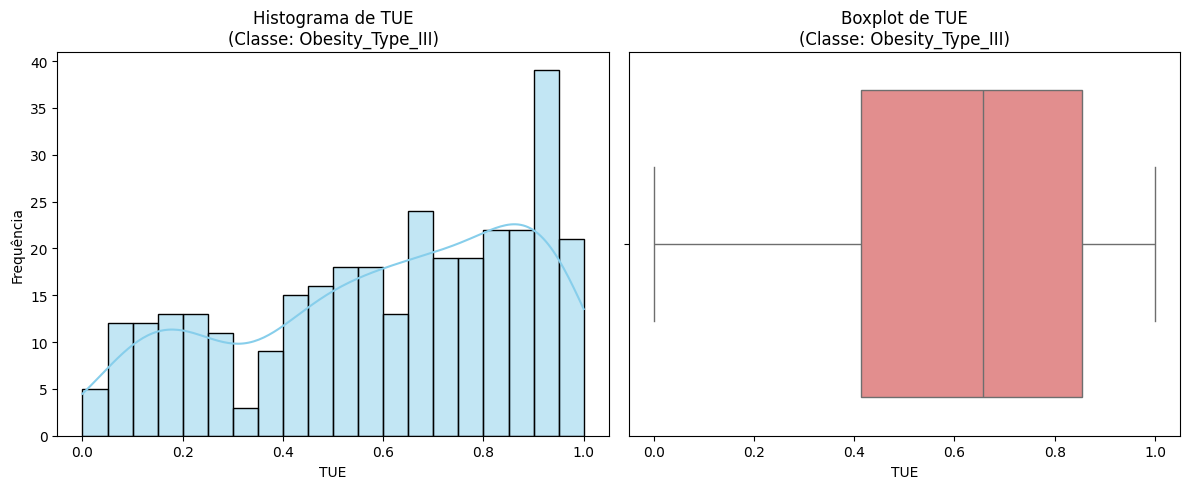

üìà Estat√≠sticas de 'TUE' para a classe 'Obesity_Type_III':
   M√©dia (Œº): 0.60
   Desvio padr√£o (œÉ): 0.28
   Assimetria (Œ≥): -0.45
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Overweight_Level_I ---


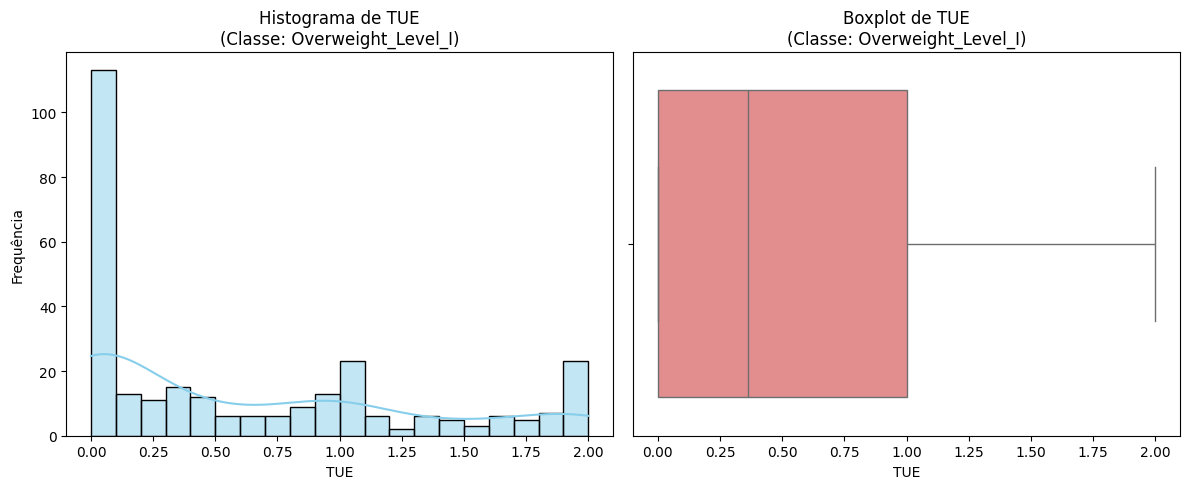

üìà Estat√≠sticas de 'TUE' para a classe 'Overweight_Level_I':
   M√©dia (Œº): 0.61
   Desvio padr√£o (œÉ): 0.68
   Assimetria (Œ≥): 0.79
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Overweight_Level_II ---


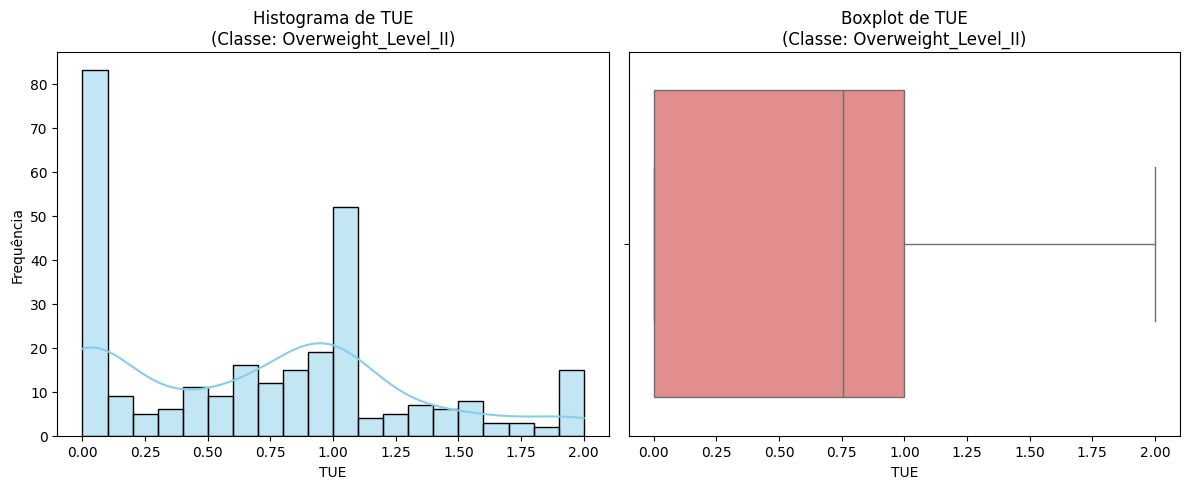

üìà Estat√≠sticas de 'TUE' para a classe 'Overweight_Level_II':
   M√©dia (Œº): 0.70
   Desvio padr√£o (œÉ): 0.59
   Assimetria (Œ≥): 0.40
--------------------------------------------------


In [ ]:
unique_classes = sorted(data['NObeyesdad'].unique())

for col in numeric_cols:
    
    # Imprime um cabe√ßalho grande para separar a an√°lise de cada vari√°vel
    print(f"\n\n{'='*25} AN√ÅLISE DA VARI√ÅVEL: {col.upper()} {'='*25}")

    # 2. LOOP INTERNO: Passa por cada classe de obesidade
    for cls in unique_classes:
        
        # Filtra o DataFrame para obter apenas os dados da classe atual
        subset_data = data[data['NObeyesdad'] == cls]
        
        # Imprime um sub-cabe√ßalho para a classe que est√° sendo analisada
        print(f"\n--- Analisando '{col}' para a Classe: {cls} ---")

        # Verifica se h√° dados para analisar neste subconjunto
        if subset_data[col].dropna().empty:
            print(f"   -> N√£o h√° dados dispon√≠veis para a vari√°vel '{col}' na classe '{cls}'.")
            continue

        # --- Gera√ß√£o dos Gr√°ficos para o subconjunto ---
        plt.figure(figsize=(12, 5))

        # Subplot 1: Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(subset_data[col], bins=20, kde=True, color='skyblue')
        plt.title(f'Histograma de {col}\n(Classe: {cls})')
        plt.xlabel(col)
        plt.ylabel('Frequ√™ncia')

        # Subplot 2: Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=subset_data[col], color='lightcoral')
        plt.title(f'Boxplot de {col}\n(Classe: {cls})')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

        # --- C√°lculo das Estat√≠sticas para o subconjunto ---
        mean = subset_data[col].mean()
        std = subset_data[col].std()
        skewness = skew(subset_data[col].dropna())

        print(f"Estat√≠sticas de '{col}' para a classe '{cls}':")
        print(f"   M√©dia (Œº): {mean:.2f}")
        print(f"   Desvio padr√£o (œÉ): {std:.2f}")
        print(f"   Assimetria (Œ≥): {skewness:.2f}")
        print("-" * 50)


# Tabela - Analise Monovariada Condicional

In [40]:
for col in numeric_cols:
    
    print(f"\n--- Tabela de Estat√≠sticas para a Vari√°vel: {col} ---")
    
    # Executa o groupby e agg apenas para a coluna atual
    tabela_preditor = data.groupby('NObeyesdad')[[col]].agg(
        ['mean', 'std', lambda x: skew(x.dropna())]
    )
    
    # Renomeia as colunas para ficarem mais limpas
    tabela_preditor.columns = ['M√©dia (Œº)', 'Desvio Padr√£o (œÉ)', 'Assimetria (Œ≥)']
    
    # Exibe a tabela formatada
    print(tabela_preditor)
    print("-" * 50)


--- Tabela de Estat√≠sticas para a Vari√°vel: Age ---
                     M√©dia (Œº)  Desvio Padr√£o (œÉ)  Assimetria (Œ≥)
NObeyesdad                                                       
Insufficient_Weight  19.783237           2.669511        2.758561
Normal_Weight        21.738676           5.096756        3.134792
Obesity_Type_I       25.884941           7.755700        1.024367
Obesity_Type_II      28.233785           4.868199        0.820858
Obesity_Type_III     23.495554           2.764324       -0.517940
Overweight_Level_I   23.417674           6.125076        1.690787
Overweight_Level_II  26.996981           8.061061        1.183702
--------------------------------------------------

--- Tabela de Estat√≠sticas para a Vari√°vel: Height ---
                     M√©dia (Œº)  Desvio Padr√£o (œÉ)  Assimetria (Œ≥)
NObeyesdad                                                       
Insufficient_Weight   1.691117           0.099687       -0.100568
Normal_Weight         1.676585    

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\1743422225.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ['mean', 'std', lambda x: skew(x.dropna())]
C:\Users\diego\AppData\Local\Temp\ipykernel_12956\1743422225.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ['mean', 'std', lambda x: skew(x.dropna())]


# An√°lise bivariada

In [6]:
# carrega-se o dataset novamente
df = pd.read_csv("ObesityDataSet.csv")

# converte as colunas que s√£o categ√≥ricas para valores num√©ricos
cat_cols = ['Gender', 'FAVC', 'CAEC', 'CALC', 'SCC', 'MTRANS']
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# selecionamos apenas as colunas num√©ricas
num_cols = df_encoded.select_dtypes(include='number').columns

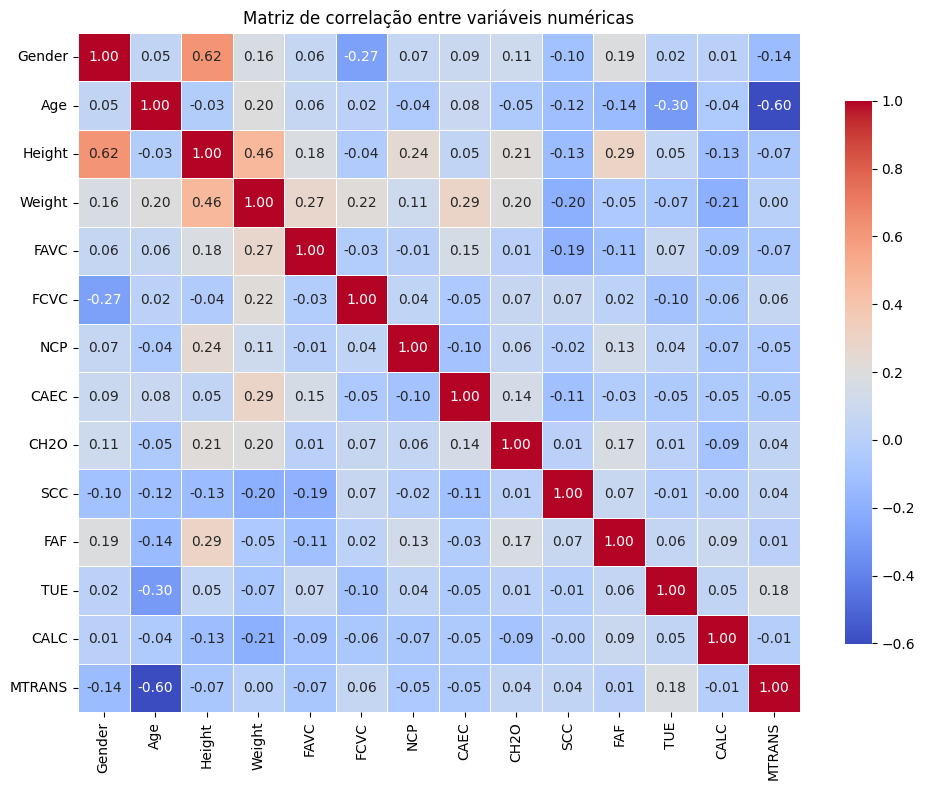


Top 10 correla√ß√µes mais fortes:

Gender  Gender    1.000000
        Height    0.618466
Age     MTRANS   -0.601945
Height  Weight    0.463136
Age     TUE      -0.296931
Height  FAF       0.294709
Weight  CAEC      0.287493
Gender  FCVC     -0.274505
Weight  FAVC      0.272300
Height  NCP       0.243672
dtype: float64


In [ ]:
# matriz de correla√ß√£o
corr_matrix = df_encoded[num_cols].corr()

# Plot da matriz de correla√ß√£o
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Matriz de correla√ß√£o entre vari√°veis num√©ricas")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()

# Identificando as correla√ß√µes mais fortes
corr_pairs = (
    corr_matrix.unstack()
    .drop_duplicates()
    .sort_values(key=lambda x: abs(x), ascending=False)
)
print("\nTop 10 correla√ß√µes mais fortes:\n")
print(corr_pairs.head(10))

In [ ]:
df.columns = df.columns.str.strip()

numeric_cols = [
    "Age", "Height", "Weight", "FCVC", "NCP", "CH2O",
    "FAF", "TUE"
]

output_dir = "figures/bivariate_plots"
os.makedirs(output_dir, exist_ok=True)

# Gera gr√°fico de dispers√£o entre todos os pares de vari√°veis num√©ricas
for i, x_var in enumerate(numeric_cols):
    for j, y_var in enumerate(numeric_cols):
        if i < j:  # para evitar pares repetidos e plots diagonais
            plt.figure(figsize=(6, 5))
            sns.scatterplot(
                data=df,
                x=x_var,
                y=y_var,
                hue="NObeyesdad",   
                palette="viridis",
                s=50,
                alpha=0.8
            )
            plt.title(f"Rela√ß√£o entre {x_var} e {y_var}")
            plt.xlabel(x_var)
            plt.ylabel(y_var)
            plt.legend(title="Classe de obesidade", bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()

            # Caminho de sa√≠da atualizado
            filename = f"{output_dir}/scatter_{x_var}_vs_{y_var}.png"
            plt.savefig(filename, dpi=300)
            plt.close()

print(f"\ngr√°ficos salvos na pasta com sucesso")



gr√°ficos salvos na pasta com sucesso


Esses resultados refor√ßam que, embora existam depend√™ncias naturais entre algumas vari√°veis f√≠sicas e demogr√°ficas, os fatores comportamentais permanecem relativamente independentes, favorecendo an√°lises multivariadas como a PCA para identificar combina√ß√µes de atributos com maior poder discriminativo entre classes de obesidade.

# PCA 

In [16]:
data_pca = pd.read_csv('ObesityDataSet.csv')

## 1 Pr√©-processamento (Obriga√ß√µes Cr√≠ticas)
O PCA tem duas exig√™ncias fundamentais:

Somente dados num√©ricos: Voc√™ precisa converter suas vari√°veis categ√≥ricas em n√∫meros.

Mesma escala: Voc√™ precisa padronizar os dados para que vari√°veis com escalas diferentes (como Peso e FAF) tenham o mesmo "peso" na an√°lise.

In [17]:
# --- Defini√ß√£o das Colunas (Ajuste se necess√°rio) ---
target_col = 'NObeyesdad'

# Colunas num√©ricas (do seu trabalho anterior)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Colunas categ√≥ricas (todas que n√£o s√£o num√©ricas e nem o alvo)
categorical_cols = [col for col in data_pca.columns if col not in numeric_cols + [target_col]]

# --- In√≠cio do Pr√©-processamento ---

# 1. Separar Preditores (X) e Alvo (y)
X = data.drop(target_col, axis=1)
y = data[target_col] # Vamos guardar o 'y' para colorir o gr√°fico no final


# 2.Mapeamento para vari√°veis ordinais (ajuste os valores se forem diferentes)
mapa_caec = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
mapa_calc = {'no': 0, 'Sometimes': 1, 'Frequently': 2} # Ajuste se 'Frequently' existir

data_pca['CAEC'] = data['CAEC'].map(mapa_caec)
data_pca['CALC'] = data['CALC'].map(mapa_calc)

# Agora, adicione 'CAEC' e 'CALC' √† lista 'numeric_cols'
# Elas ser√£o padronizadas (mean=0, std=1) junto com as outras
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'CALC']

# 3. Converter Vari√°veis Categ√≥ricas (One-Hot Encoding)
# Isso transforma 'Gender' (Male/Female) em 'Gender_Male' (0 ou 1) e 'Gender_Female' (0 ou 1)
# √â a forma correta de tratar dados categ√≥ricos para o PCA
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Formato original dos preditores: {X.shape}")
print(f"Formato ap√≥s One-Hot Encoding: {X_processed.shape}")

# 4. Padronizar os Dados (M√©dia 0, Desvio Padr√£o 1)
# X_scaled = (X - m√©dia) / desvio_padr√£o
X_scaled = (X_processed - X_processed.mean()) / X_processed.std()

print("\nDados pr√©-processados e padronizados. Prontos para o PCA.")

Formato original dos preditores: (2111, 16)
Formato ap√≥s One-Hot Encoding: (2111, 23)

Dados pr√©-processados e padronizados. Prontos para o PCA.


## 2 Matriz de Covariancia

In [18]:
# --- Implementa√ß√£o do PCA ---

# 4. Calcular a Matriz de Covari√¢ncia
# Usamos .T (transposta) porque np.cov espera vari√°veis nas linhas,
# mas nossos dados t√™m vari√°veis nas colunas.
# Alternativa mais segura: np.cov(X_scaled, rowvar=False)
cov_matrix = np.cov(X_scaled, rowvar=False)

print(f"\nFormato da Matriz de Covari√¢ncia: {cov_matrix.shape}")


Formato da Matriz de Covari√¢ncia: (23, 23)


## Passo 3: Decomposi√ß√£o (Autovetores e Autovalores)

In [19]:
# 5. Calcular Autovetores e Autovalores
# 'eigenvectors' √© uma matriz onde CADA COLUNA √© um autovetor
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Autovetores e Autovalores calculados.")

Autovetores e Autovalores calculados.


## Passo 4: Sele√ß√£o dos Componentes Principais (k=4)

In [20]:
# 6. Ordenar Autovetores por Autovalores (do maior para o menor)

# Pega os √≠ndices que ordenariam os autovalores em ordem decrescente
indices_ordenados = np.argsort(eigenvalues)[::-1]

# Reordena os autovalores e autovetores com base nesses √≠ndices
eigenvalues_ordenados = eigenvalues[indices_ordenados]
eigenvectors_ordenados = eigenvectors[:, indices_ordenados] # Importante: fatiando as colunas


## Tabela de Vari√¢ncia

In [21]:
# 1. Calcular a vari√¢ncia explicada
total_variance = np.sum(eigenvalues_ordenados)
explained_variance_ratio = eigenvalues_ordenados / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 2. Criar os r√≥tulos para a tabela
num_pcs = X_scaled.shape[1] # N√∫mero de colunas/features (ex: 22)
pc_labels = [f'PC{i+1}' for i in range(num_pcs)]

# 3. Criar a Tabela (DataFrame)
df_variance = pd.DataFrame({
    'Componente': pc_labels,
    'Autovalor (Eigenvalue)': eigenvalues_ordenados,
    'Vari√¢ncia Explicada (%)': explained_variance_ratio * 100,
    'Vari√¢ncia Acumulada (%)': cumulative_variance_ratio * 100
})

print("--- Tabela de Vari√¢ncia Explicada por Componente Principal ---")

# Configura o pandas para mostrar todas as linhas (se houver muitas)
pd.set_option('display.max_rows', None)

# .set_index('Componente') deixa a tabela mais limpa
# .head(10) mostra apenas os 10 primeiros, que s√£o os mais importantes
# Remova o .head(10) se quiser ver todos os 22
print(df_variance.set_index('Componente').head(10).to_string(float_format="%.4f"))

# Resetar a op√ß√£o de display
pd.reset_option('display.max_rows')

--- Tabela de Vari√¢ncia Explicada por Componente Principal ---
            Autovalor (Eigenvalue)  Vari√¢ncia Explicada (%)  Vari√¢ncia Acumulada (%)
Componente                                                                          
PC1                         3.1672                  13.7704                  13.7704
PC2                         2.1119                   9.1823                  22.9527
PC3                         1.8750                   8.1522                  31.1050
PC4                         1.7138                   7.4511                  38.5561
PC5                         1.3679                   5.9475                  44.5036
PC6                         1.2759                   5.5472                  50.0508
PC7                         1.2303                   5.3490                  55.3997
PC8                         1.1518                   5.0077                  60.4075
PC9                         1.0345                   4.4977                  64.9052

## 5 Proje√ß√£o dos Dados

In [22]:
print("Projetando dados nos 2 primeiros componentes principais...")

# 1. Selecionar os 2 Principais Componentes
matriz_projecao_2d = eigenvectors_ordenados[:, :2] 

print(f"Formato da Matriz de Proje√ß√£o (top 2 componentes): {matriz_projecao_2d.shape}")

# 2. Projetar os dados no novo espa√ßo 2D
# X_scaled, y, e target_col devem estar definidos nos passos anteriores
X_pca_2d = np.dot(X_scaled, matriz_projecao_2d)

# 3. Criar a "Tabela com os 2 PCs"
df_plot_2d = pd.DataFrame(
    data=X_pca_2d, 
    columns=['PC1 (Componente Principal 1)', 'PC2 (Componente Principal 2)']
)
df_plot_2d = pd.concat([df_plot_2d, y.reset_index(drop=True)], axis=1)

print("\n--- Tabela com os 2 PCs e a Classe (primeiras 5 linhas) ---")
print(df_plot_2d.head())

Projetando dados nos 2 primeiros componentes principais...
Formato da Matriz de Proje√ß√£o (top 2 componentes): (23, 2)

--- Tabela com os 2 PCs e a Classe (primeiras 5 linhas) ---
   PC1 (Componente Principal 1)  PC2 (Componente Principal 2)  \
0                     -1.697639                     -0.800550   
1                     -1.852396                      0.987902   
2                     -0.311969                     -2.408531   
3                     -1.135260                     -3.391142   
4                     -0.448828                      0.851563   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II  


## 6 Plotagem


Gerando o gr√°fico de dispers√£o 2D final...


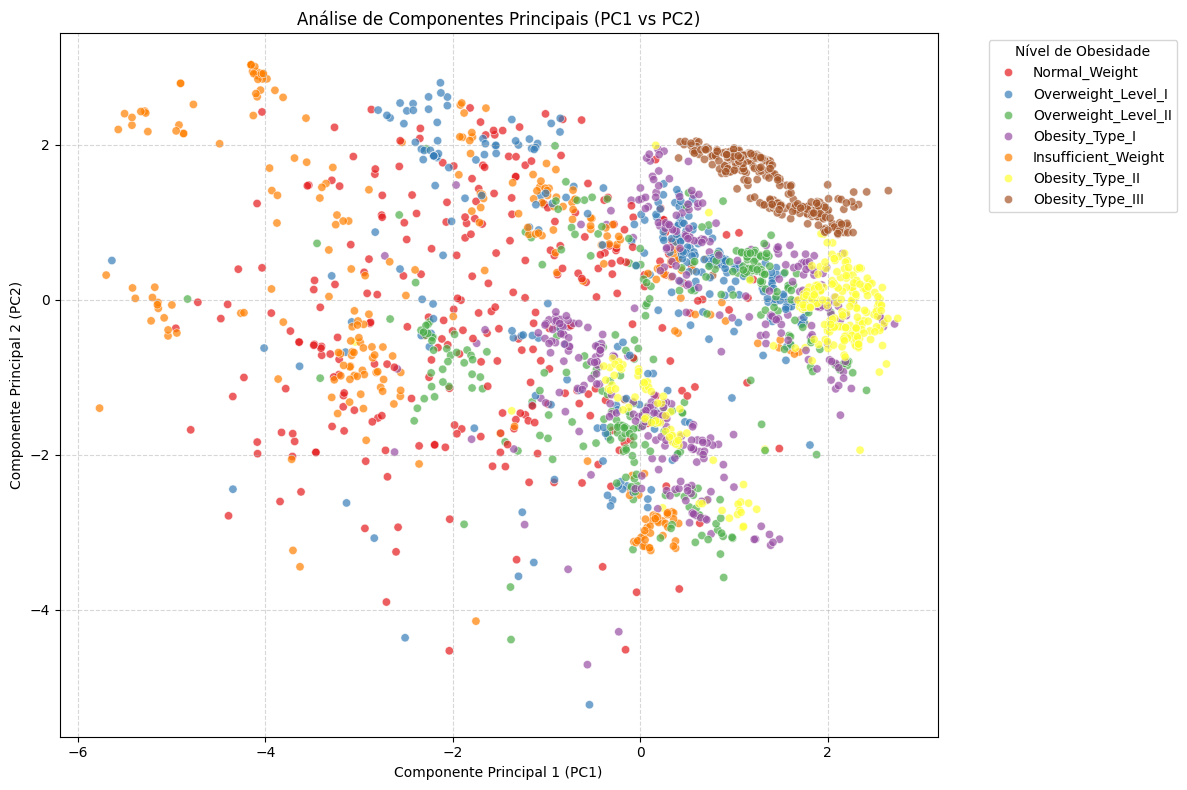

In [ ]:
# Criar pasta de sa√≠da
output_dir = "figures/pca_analysis"
os.makedirs(output_dir, exist_ok=True)

print("\nGerando o gr√°fico de dispers√£o 2D final...")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_plot_2d, 
    x='PC1 (Componente Principal 1)', 
    y='PC2 (Componente Principal 2)', 
    palette='Set1',
    alpha=0.7
)
plt.title('An√°lise de Componentes Principais (PC1 vs PC2)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='N√≠vel de Obesidade', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# üëâ Salvar o gr√°fico
plt.savefig(f"{output_dir}/pca_scatter_2d.png", dpi=300)
plt.show()

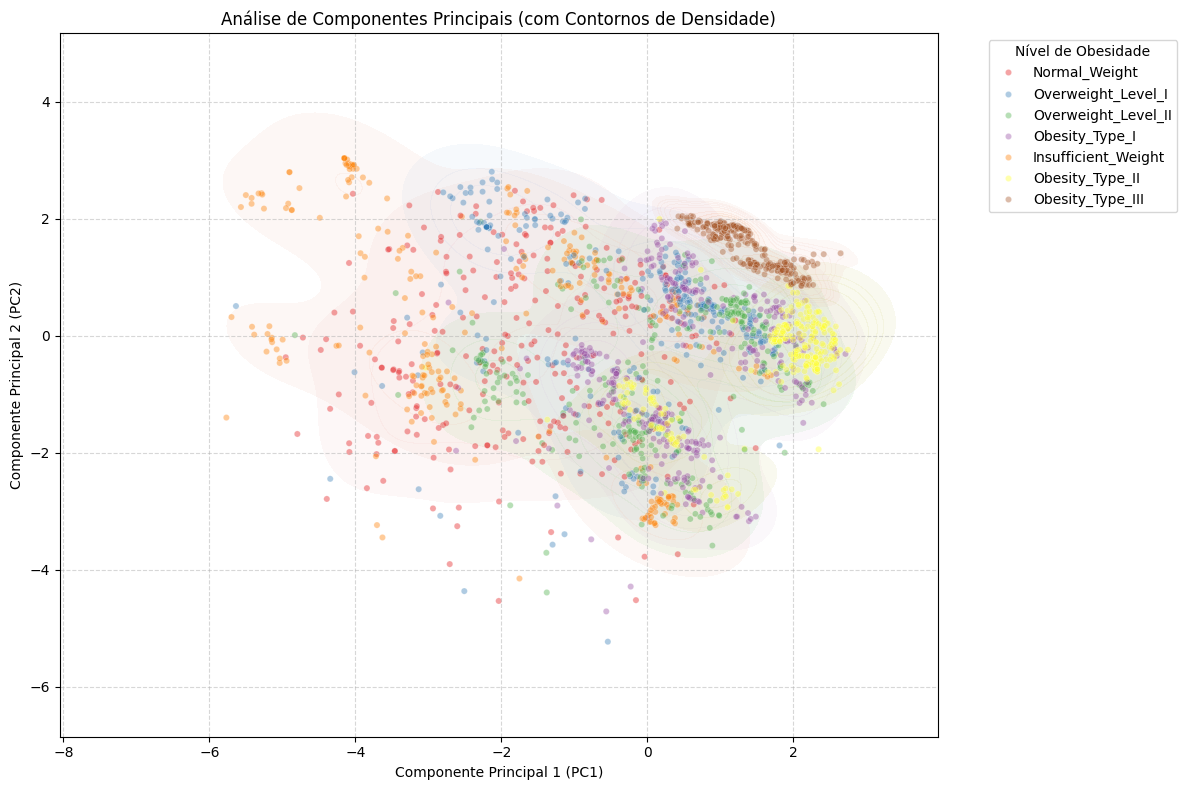

In [25]:
plt.figure(figsize=(12, 8))

# Contornos de densidade (KDE)
sns.kdeplot(
    data=df_plot_2d,
    x='PC1 (Componente Principal 1)',
    y='PC2 (Componente Principal 2)',
    hue=target_col,
    palette='Set1',
    fill=True,
    alpha=0.1,
    legend=False
)

# 2Ô∏è‚É£ Pontos de dispers√£o
sns.scatterplot(
    data=df_plot_2d, 
    x='PC1 (Componente Principal 1)', 
    y='PC2 (Componente Principal 2)', 
    hue=target_col,
    palette='Set1',
    alpha=0.4,
    s=20,
    legend=True
)

plt.title('An√°lise de Componentes Principais (com Contornos de Densidade)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='N√≠vel de Obesidade', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# üëâ Salvar o gr√°fico
plt.savefig(f"{output_dir}/pca_scatter_density.png", dpi=300)
plt.show()

A an√°lise de componentes principais (PCA) nos dois primeiros componentes (PC1 e PC2) foi bem-sucedida em reduzir a dimensionalidade e revelar a estrutura subjacente dos dados.

O PC1 capturou o espectro principal de peso, enquanto o PC2 foi eficaz em separar os diferentes tipos de obesidade severa.

A visualiza√ß√£o (Figura X) demonstra uma clara separabilidade linear para as classes de obesidade mais altas: Obesity_Type_II e Obesity_Type_III formam clusters (aglomerados) densos e distintos no quadrante direito do gr√°fico.

Em contrapartida, a an√°lise tamb√©m revelou um alto grau de sobreposi√ß√£o entre as classes de peso normal, sobrepeso e obesidade tipo I, sugerindo uma forte semelhan√ßa em seus atributos que torna a separa√ß√£o linear por este m√©todo dif√≠cil.

### Resumo dos Resultados do PCA

A An√°lise de Componentes Principais (PCA) foi usada para visualizar a separabilidade linear das 7 classes de obesidade. Os dois primeiros componentes (PC1 e PC2) explicam apenas 22.95% da vari√¢ncia total, indicando alta complexidade. A visualiza√ß√£o 2D mostra que o PC1 separa as classes por "espectro de peso" (magro vs. obeso) e o PC2 consegue isolar os tipos de obesidade severa (`Type_II` e `Type_III`). Notavelmente, h√° uma grande sobreposi√ß√£o entre as classes `Normal_Weight` e `Insufficient_Weight`, bem como entre `Overweight_I`, `Overweight_II` e `Obesity_Type_I`, sugerindo que estes grupos n√£o s√£o linearmente separ√°veis com base nos atributos medidos.